In [25]:
import pandas as pd
import numpy as np
from  matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import networkx as nx
from scipy.stats import skew, kurtosis
import scipy.stats as stats
import statistics
from itertools import product

In [83]:
years = range(2010, 2021)
labels = ['eu', 'gl', 'bc']
all_identifiers = list(years) + labels

results = []

for identifier in all_identifiers:
    # Load parquet files and .npy file
    clus_df = pd.read_parquet(f'clus_{identifier}.parquet')
    hub_aut_df = pd.read_parquet(f'hub_aut_{identifier}.parquet')
    bc_df = pd.read_parquet(f'dfz_s_{identifier}_bc.parquet')
    
    # Clustering coefficient stats
    clus_values = clus_df['Clustering_Coefficient']
    clus_stats = [
        clus_values.mean(),
        clus_values.std(),
        skew(clus_values),
        kurtosis(clus_values)
    ]
    
    # Random walk betweenness stats
    bc_values =  bc_df['betweenness']
    bc_stats = [
        bc_values.mean(),
        bc_values.std(),
        skew(bc_values),
        kurtosis(bc_values)
    ]
    
    # Hub and Authority scores stats
    hub_values = hub_aut_df['hub_score']
    aut_values = hub_aut_df['authority_score']
    
    hub_stats = [
        hub_values.mean(),
        hub_values.std(),
        skew(hub_values),
        kurtosis(hub_values)
    ]
    
    aut_stats = [
        aut_values.mean(),
        aut_values.std(),
        skew(aut_values),
        kurtosis(aut_values)
    ]
    
    # Combine all stats
    all_stats = clus_stats + bc_stats + hub_stats + aut_stats
    results.append(all_stats)

# Create MultiIndex columns
columns = pd.MultiIndex.from_tuples([
    ('Clus', 'Mean'),
    ('Clus', 'STD'),
    ('Clus', 'Skewness'),
    ('Clus', 'Kurtosis'),
    ('Bc', 'Mean'),
    ('Bc', 'STD'),
    ('Bc', 'Skewness'),
    ('Bc', 'Kurtosis'),
    ('Hub', 'Mean'),
    ('Hub', 'STD'),
    ('Hub', 'Skewness'),
    ('Hub', 'Kurtosis'),
    ('Aut', 'Mean'),
    ('Aut', 'STD'),
    ('Aut', 'Skewness'),
    ('Aut', 'Kurtosis'),
])

# Create the DataFrame
Stat_measures = pd.DataFrame(results, index=all_identifiers, columns=columns)

print(Stat_measures)


          Clus                                        Bc                       \
          Mean       STD  Skewness    Kurtosis      Mean       STD   Skewness   
2010  0.000043  0.000115  6.451332   53.634791  0.004140  0.022331  13.538299   
2011  0.000041  0.000110  6.888690   62.765315  0.004142  0.022532  13.841430   
2012  0.000040  0.000112  7.478378   77.120743  0.004169  0.022957  13.750595   
2013  0.000039  0.000109  7.451721   75.907610  0.004180  0.023000  13.560836   
2014  0.000037  0.000106  7.577373   78.445852  0.004243  0.023078  13.199938   
2015  0.000037  0.000107  7.856579   85.163195  0.004250  0.022931  13.130257   
2016  0.000036  0.000107  7.969087   86.466395  0.004256  0.022804  12.974910   
2017  0.000033  0.000099  8.324830   95.774828  0.004197  0.022661  13.403036   
2018  0.000031  0.000094  8.457422   98.724045  0.004166  0.022400  13.495295   
2019  0.000031  0.000092  8.327044   95.186402  0.004199  0.022594  13.413110   
2020  0.000032  0.000095  8.

In [84]:
results2 = []

for identifier in all_identifiers:
    df = pd.read_parquet(f'dfz_{identifier}.parquet')

     # --- Weights: flatten the matrix ---
    weights = df.values.flatten()
    
    weight_stats = [
        np.mean(weights),
        np.std(weights),
        skew(weights),
        kurtosis(weights)
    ]
    
    # --- Out-strength (sum of each row) ---
    out_strength = df.sum(axis=1).values
    
    out_strength_stats = [
        np.mean(out_strength),
        np.std(out_strength),
        skew(out_strength),
        kurtosis(out_strength)
    ]
    
    # --- In-strength (sum of each column) ---
    in_strength = df.sum(axis=0).values
    
    in_strength_stats = [
        np.mean(in_strength),
        np.std(in_strength),
        skew(in_strength),
        kurtosis(in_strength)
    ]
    
    # Combine stats
    all_stats = weight_stats + out_strength_stats + in_strength_stats
    results2.append(all_stats)

# Create MultiIndex for columns
columns = pd.MultiIndex.from_tuples([
    ('Weights', 'Mean'),
    ('Weights', 'STD'),
    ('Weights', 'Skewness'),
    ('Weights', 'Kurtosis'),
    ('Out-Strength', 'Mean'),
    ('Out-Strength', 'STD'),
    ('Out-Strength', 'Skewness'),
    ('Out-Strength', 'Kurtosis'),
    ('In-Strength', 'Mean'),
    ('In-Strength', 'STD'),
    ('In-Strength', 'Skewness'),
    ('In-Strength', 'Kurtosis')
])

# Create the final DataFrame
Stat_measures2 = pd.DataFrame(results2, index=all_identifiers, columns=columns)

print(Stat_measures2)

           Weights                                           Out-Strength  \
              Mean           STD    Skewness       Kurtosis          Mean   
2010  14305.878193  7.230692e+05  248.606810  101010.164705  2.951303e+07   
2011  15402.084839  7.902536e+05  247.528120   96807.417122  3.177450e+07   
2012  16112.917680  8.638350e+05  258.121477  102031.237292  3.324095e+07   
2013  16512.047016  9.069976e+05  264.891855  106194.655357  3.406435e+07   
2014  17009.871909  9.576418e+05  274.249578  113406.527895  3.509137e+07   
2015  16899.524246  9.819549e+05  287.132119  125231.431163  3.486372e+07   
2016  17071.267118  1.011206e+06  298.413401  136643.340016  3.521802e+07   
2017  17808.682728  1.080954e+06  302.910401  138054.360545  3.673931e+07   
2018  18579.888378  1.141044e+06  308.048354  142273.236637  3.833031e+07   
2019  18979.002630  1.183676e+06  313.220396  147091.367008  3.915368e+07   
2020  19327.383725  1.236173e+06  322.295550  154393.436177  3.987239e+07   

In [85]:
Stat_measures = pd.concat([Stat_measures, Stat_measures2], axis=1)
print(Stat_measures)

          Clus                                        Bc                       \
          Mean       STD  Skewness    Kurtosis      Mean       STD   Skewness   
2010  0.000043  0.000115  6.451332   53.634791  0.004140  0.022331  13.538299   
2011  0.000041  0.000110  6.888690   62.765315  0.004142  0.022532  13.841430   
2012  0.000040  0.000112  7.478378   77.120743  0.004169  0.022957  13.750595   
2013  0.000039  0.000109  7.451721   75.907610  0.004180  0.023000  13.560836   
2014  0.000037  0.000106  7.577373   78.445852  0.004243  0.023078  13.199938   
2015  0.000037  0.000107  7.856579   85.163195  0.004250  0.022931  13.130257   
2016  0.000036  0.000107  7.969087   86.466395  0.004256  0.022804  12.974910   
2017  0.000033  0.000099  8.324830   95.774828  0.004197  0.022661  13.403036   
2018  0.000031  0.000094  8.457422   98.724045  0.004166  0.022400  13.495295   
2019  0.000031  0.000092  8.327044   95.186402  0.004199  0.022594  13.413110   
2020  0.000032  0.000095  8.

In [ ]:
#Compute the mean of each statistical measure momenta in the null model 
# 1. Ensure index is string for consistent slicing
Stat_measures.index = Stat_measures.index.astype(str)

# 2. Select rows 2010–2020
years = [str(y) for y in range(2010, 2021)]
year_data = Stat_measures.loc[years]

# 3. Compute column-wise mean
avg_row = year_data.mean(axis=0)

# 4. Create new DataFrame row
avg_df = pd.DataFrame([avg_row], index=['avg_null'])

#compute average relative  absolute growth of each statistical measure momenta in the null model
# 1. Compute relative absolute difference between consecutive years
abs_diff = (year_data.diff().abs())/ year_data.shift(1)

# 2. Drop the first row (NaN due to no previous year)
abs_diff = abs_diff.drop(index=years[0])

# 3. Compute average of those differences
avg_abs_diff_row = abs_diff.mean(axis=0)

# 4. Create new DataFrame row
avg_abs_df = pd.DataFrame([avg_abs_diff_row], index=['avg_rel_increm'])

# 5. Insert into original DataFrame in the right position (after '2020')
# Reconstruct with proper row order
before = Stat_measures.loc[:'2020']
after = Stat_measures.loc['eu':]  # includes 'eu', 'gl', 'bc'
Stat_measures = pd.concat([before, avg_df, avg_abs_df, after])

print(Stat_measures)

In [86]:
Stat_measures.index = Stat_measures.index.astype(str)
Stat_measures.to_parquet('Stat_measures.parquet', index=True)

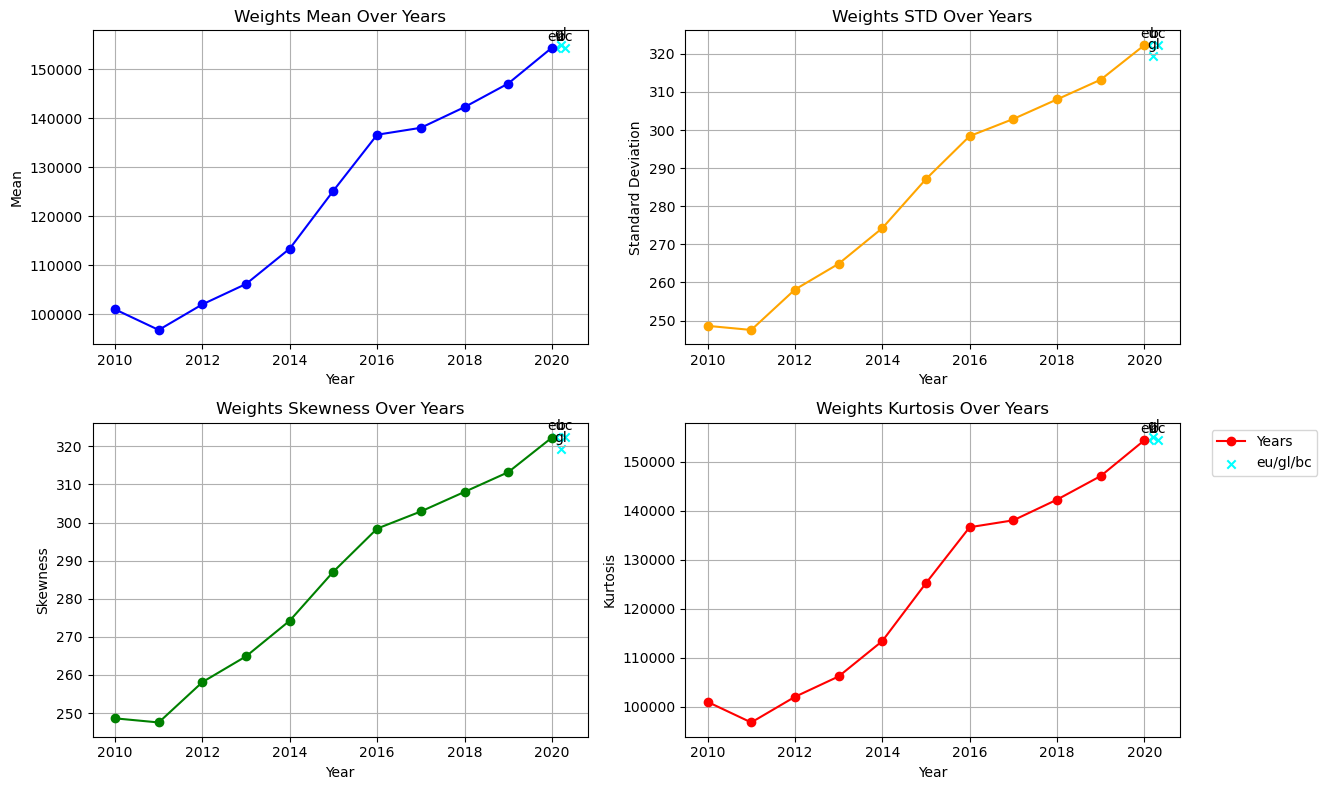

In [57]:
import matplotlib.pyplot as plt

# Years
years = list(range(2010, 2021))
# Add year label offsets for eu, gl, bc
years_extra = [2020 + 0.1, 2020 + 0.2, 2020 + 0.3]
labels_extra = ['eu', 'gl', 'bc']

# Weights data for Mean, STD, Skewness, Kurtosis
mean_weights = [
    101010.164705, 96807.417122, 102031.237292, 106194.655357,
    113406.527895, 125231.431163, 136643.340016, 138054.360545,
    142273.236637, 147091.367008, 154393.436177
]
mean_extra = [154353.956561, 155030.943901, 154364.108729]

std_weights = [
    248.606810, 247.528120, 258.121477, 264.891855,
    274.249578, 287.132119, 298.413401, 302.910401,
    308.048354, 313.220396, 322.295550
]
std_extra = [322.429955, 319.429623, 322.404283]

skewness_weights = [
    248.606810, 247.528120, 258.121477, 264.891855,
    274.249578, 287.132119, 298.413401, 302.910401,
    308.048354, 313.220396, 322.295550
]
skewness_extra = [322.429955, 319.429623, 322.404283]

kurtosis_weights = [
    101010.164705, 96807.417122, 102031.237292, 106194.655357,
    113406.527895, 125231.431163, 136643.340016, 138054.360545,
    142273.236637, 147091.367008, 154393.436177
]
kurtosis_extra = [154353.956561, 155030.943901, 154364.108729]

# Create subplots
plt.figure(figsize=(12, 8))

# Plot Mean
plt.subplot(2, 2, 1)
plt.plot(years, mean_weights, marker='o', linestyle='-', color='b', label='Years')
plt.scatter(years_extra, mean_extra, color='cyan', marker='x', label='eu/gl/bc')
for x, y, label in zip(years_extra, mean_extra, labels_extra):
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(0,5), ha='center')
plt.title('Weights Mean Over Years')
plt.xlabel('Year')
plt.ylabel('Mean')
plt.grid(True)

# Plot Standard Deviation
plt.subplot(2, 2, 2)
plt.plot(years, std_weights, marker='o', linestyle='-', color='orange', label='Years')
plt.scatter(years_extra, std_extra, color='cyan', marker='x', label='eu/gl/bc')
for x, y, label in zip(years_extra, std_extra, labels_extra):
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(0,5), ha='center')
plt.title('Weights STD Over Years')
plt.xlabel('Year')
plt.ylabel('Standard Deviation')
plt.grid(True)

# Plot Skewness
plt.subplot(2, 2, 3)
plt.plot(years, skewness_weights, marker='o', linestyle='-', color='green', label='Years')
plt.scatter(years_extra, skewness_extra, color='cyan', marker='x', label='eu/gl/bc')
for x, y, label in zip(years_extra, skewness_extra, labels_extra):
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(0,5), ha='center')
plt.title('Weights Skewness Over Years')
plt.xlabel('Year')
plt.ylabel('Skewness')
plt.grid(True)

# Plot Kurtosis
plt.subplot(2, 2, 4)
plt.plot(years, kurtosis_weights, marker='o', linestyle='-', color='red', label='Years')
plt.scatter(years_extra, kurtosis_extra, color='cyan', marker='x', label='eu/gl/bc')
for x, y, label in zip(years_extra, kurtosis_extra, labels_extra):
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(0,5), ha='center')
plt.title('Weights Kurtosis Over Years')
plt.xlabel('Year')
plt.ylabel('Kurtosis')
plt.grid(True)

plt.tight_layout()
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()


In [2]:
Z = {}
for year in range(2010, 2021):
    Z[year] = pd.read_parquet(f'dfz_{year}.parquet')

weights = {}
in_strength = {}
out_strength = {}

for year in range(2010, 2021):
    weights[year] = Z[year].values.flatten() 
    in_strength[year] = Z[year].sum(axis=0).values
    out_strength[year] = Z[year].sum(axis=1).values


In [3]:
eu = 'eu'
gl ='gl'
bc = 'bc'
labels = [eu, gl, bc]
for model in labels:
    Z[model] = pd.read_parquet(f'dfz_{model}.parquet')

for model in labels:
    weights[model] = Z[model].values.flatten() 
    in_strength[model] = Z[model].sum(axis=0).values
    out_strength[model] = Z[model].sum(axis=1).values



In [23]:
#G = {}
G_s = {}
for year in range(2010, 2021):
    #G[year] = nx.from_pandas_adjacency(Z[year], create_using=nx.DiGraph)
    Z_s[year].index = Z_s[year].columns
    G_s[year] = nx.from_pandas_adjacency(Z_s[year], create_using=nx.DiGraph)

for model in labels:
    #G[model] = nx.from_pandas_adjacency(Z[model], create_using=nx.DiGraph)
    Z_s[model].index = Z_s[model].columns
    G_s[model] = nx.from_pandas_adjacency(Z_s[model], create_using=nx.DiGraph)

In [22]:
print(Z_s[2010].info())
Z_s[2010].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2063 entries, 0 to 2062
Columns: 2063 entries, AUS_AGRagr to TUR_PROleg
dtypes: float64(2063)
memory usage: 32.5 MB
None


,AUS_AGRagr,AUS_AGRfor,AUS_AGRfis,AUS_ENRcoa,AUS_ENRoil,AUS_ENRgas,AUS_MIN+,AUS_MANfoo,AUS_MANtex,AUS_MANwoo,...,SVK_ENRele,SVK_TRAair,SVK_FINser,SVN_MANfoo,SVN_ENRoil,TUR_HEA+,TUR_MANrep,TUR_COMvid,TUR_COMcom,TUR_PROleg
0,5.373638e+06,3.492903e+02,660202.192941,0.000000,0.000000e+00,0.000000,3.968767e+03,1.926987e+07,371093.197209,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
1,5.006035e+05,1.996743e+06,11.351224,23433.298195,2.841600e+03,0.000000,7.128926e+04,0.000000e+00,0.000000,835609.425549,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
2,3.839705e+05,0.000000e+00,84261.458033,4557.137740,1.517886e+03,2888.505066,1.193252e+04,1.430680e+06,36190.165317,466.452281,...,0.0,0.028993,0.0,0.0,0.0,0.0,0.0,0.249549,0.124245,0.0
3,3.334881e+02,0.000000e+00,0.000000,5365.991674,0.000000e+00,0.000000,3.025595e+04,6.398896e+04,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
4,2.952096e+05,1.902656e+05,175648.136995,640907.053160,4.374244e+06,50132.651635,1.094271e+06,6.090849e+04,4837.271198,36066.472858,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0


In [4]:
Z_s = {}
for year in range(2010, 2021):
    Z_s[year] = pd.read_parquet(f'dfz_s_{year}.parquet')

weights_s = {}
in_strength_s = {}
out_strength_s = {}

for year in range(2010, 2021):
    weights_s[year] = Z_s[year].values.flatten() 
    in_strength_s[year] = Z_s[year].sum(axis=0).values
    out_strength_s[year] = Z_s[year].sum(axis=1).values


In [5]:
for model in labels:
    Z_s[model] = pd.read_parquet(f'dfz_s_{model}.parquet')

for model in labels:
    weights_s[model] = Z_s[model].values.flatten() 
    in_strength_s[model] = Z_s[model].sum(axis=0).values
    out_strength_s[model] = Z_s[model].sum(axis=1).values

In [6]:
clus = {}
hub_aut= {}

for year in range(2010, 2021):
    clus[year] = pd.read_parquet(f'clus_{year}.parquet') 
    hub_aut[year] = pd.read_parquet(f'hub_aut_{year}.parquet') 

clus_values = {}
hub_values = {}
aut_values = {}

for year in range(2010, 2021):
    clus_values[year] = clus[year]['Clustering_Coefficient']
    hub_values[year]=hub_aut[year]['hub_score']
    aut_values[year]=hub_aut[year]['authority_score']

In [7]:
for model in labels:
    clus[model] = pd.read_parquet(f'clus_{model}.parquet') 
    hub_aut[model] = pd.read_parquet(f'hub_aut_{model}.parquet')     

In [8]:
bce = {}
for year in range(2010, 2021):
    bce[year] = pd.read_parquet(f'dfz_s_{year}_bc.parquet')

bce_values = {}
for year in range(2010, 2021):
    bce_values[year] = bce[year]['betweenness']


In [9]:
for model in labels:
    bce[model] = pd.read_parquet(f'dfz_s_{model}_bc.parquet')

In [129]:
def log_average_conditional(data_dict, num_bins=70, title='', output_prefix='output'):
    all_values = []
    for year_data in data_dict.values():
        vals = np.array(year_data)
        vals = vals[vals > 0]  # 🔹 Remove zero or negative values
        vals = np.log10(vals)    # 🔹 Now it's safe to log
        all_values.append(vals)
    all_values = np.concatenate(all_values)

 # 🔸 2. Bin edges
    bin_edges = np.linspace(np.min(all_values), np.max(all_values), num_bins + 1)

    # 🔸 3. Compute conditional matrices for each year-pair
    conditional_stack = []
    years = sorted(data_dict.keys())

    for y1, y2 in zip(years[:-1], years[1:]):
        x_vals = np.array(data_dict[y1])
        y_vals = np.array(data_dict[y2])

        mask = (x_vals > 0) & (y_vals > 0)
        x_log = np.log10(x_vals[mask])
        y_log = np.log10(y_vals[mask])

        joint_hist, _, _ = np.histogram2d(x_log, y_log, bins=[bin_edges, bin_edges])
        joint_prob = joint_hist / np.sum(joint_hist)

        # Marginal for x (year T)
        marginal_x = np.sum(joint_prob, axis=1)

        conditional_prob = np.zeros_like(joint_prob)
        for i in range(marginal_x.shape[0]):
            if marginal_x[i] > 0:
                conditional_prob[i, :] = joint_prob[i, :] / marginal_x[i]
                conditional_prob[i, :] /= np.sum(conditional_prob[i, :])  # Normalize

        conditional_stack.append(conditional_prob)

    # 🔸 4. Average conditional
    average_conditional = np.mean(conditional_stack, axis=0)

    # 🔸 5. Plot
    X, Y = np.meshgrid(bin_edges, bin_edges)
    plt.figure(figsize=(8, 6))
    plt.pcolormesh(X, Y, average_conditional.T, cmap='plasma')
    plt.xlabel('log(Value) at year T')
    plt.ylabel('log(Value) at year T+1')
    plt.colorbar(label='Avg. Conditional Density P(y|x)')
    plt.title(f'Average Conditional Density:{title}')
    png_path = f"{output_prefix}.png"
    plt.savefig(png_path, dpi=300)
    plt.show()
    plt.close()

    # 🔸 6. Save to Parquet
    # Convert matrix to DataFrame with bin labels
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
    df = pd.DataFrame(average_conditional, columns=bin_centers, index=bin_centers)
    df.index.name = 'log(Value at year T)'
    df.columns.name = 'log(Value at year T+1)'

    parquet_path = f"{output_prefix}.parquet"
    df.to_parquet(parquet_path)

    print(f"Saved PNG: {png_path}")
    print(f"Saved Parquet: {parquet_path}")

    


    







    

In [ ]:
def average_conditional(data_dict, num_bins=70, title='', output_prefix='output', plot_value_max=None):
    all_values = []
    for year_data in data_dict.values():
        vals = np.array(year_data)
        all_values.append(vals)
    all_values = np.concatenate(all_values)

 # 🔸 2. Bin edges
    bin_edges = np.linspace(np.min(all_values), np.max(all_values), num_bins + 1)

    # 🔸 3. Compute conditional matrices for each year-pair
    conditional_stack = []
    years = sorted(data_dict.keys())

    for y1, y2 in zip(years[:-1], years[1:]):
        x_vals = np.array(data_dict[y1])
        y_vals = np.array(data_dict[y2])

        joint_hist, _, _ = np.histogram2d(x_vals, y_vals, bins=[bin_edges, bin_edges])
        joint_prob = joint_hist / np.sum(joint_hist)

        # Marginal for x (year T)
        marginal_x = np.sum(joint_prob, axis=1)

        conditional_prob = np.zeros_like(joint_prob)
        for i in range(marginal_x.shape[0]):
            if marginal_x[i] > 0:
                conditional_prob[i, :] = joint_prob[i, :] / marginal_x[i]
                conditional_prob[i, :] /= np.sum(conditional_prob[i, :])  # Normalize

        conditional_stack.append(conditional_prob)

    # 🔸 4. Average conditional
    average_conditional = np.mean(conditional_stack, axis=0)

    # 🔸 5. Plot
    # 🔹 Override plotting range if requested
    plot_edges = bin_edges
    if plot_value_max is not None:
        plot_edges = np.linspace(0, plot_value_max, num_bins + 1)

    X, Y = np.meshgrid(plot_edges, plot_edges)
    plt.figure(figsize=(8, 6))
    plt.pcolormesh(X, Y, average_conditional.T, cmap='plasma', shading='auto')
    plt.xlabel('Value at year T')
    plt.ylabel('Value at year T+1')
    plt.colorbar(label='Avg. Conditional Density P(y|x)')
    plt.title(f'Average Conditional Density:{title}')
    png_path = f"{output_prefix}.png"
    plt.savefig(png_path, dpi=300)
    plt.show()
    plt.close()

    # 🔸 6. Save to Parquet
    # Convert matrix to DataFrame with bin labels
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
    df = pd.DataFrame(average_conditional, columns=bin_centers, index=bin_centers)
    df.index.name = 'Value at year T'
    df.columns.name = 'Value at year T+1'

    parquet_path = f"{output_prefix}.parquet"
    df.to_parquet(parquet_path)

    print(f"Saved PNG: {png_path}")
    print(f"Saved Parquet: {parquet_path}")

In [ ]:
def symlog_average_conditional(data_dict, num_bins=70, title='', output_prefix='output', linthresh=1e-2):
    # 🔹 1. Collect all values (including zeros) to define global bin edges
    all_values = []
    for year_data in data_dict.values():
        vals = np.array(year_data)
        all_values.append(vals)
    all_values = np.concatenate(all_values)

    # 🔸 2. Bin edges over full range
    bin_edges = np.linspace(np.min(all_values), np.max(all_values), num_bins + 1)

    # 🔸 3. Compute conditional matrices for each year-pair
    conditional_stack = []
    years = sorted(data_dict.keys())

    for y1, y2 in zip(years[:-1], years[1:]):
        x_vals = np.array(data_dict[y1])
        y_vals = np.array(data_dict[y2])

        # Mask finite values only (to avoid NaNs or inf)
        mask = np.isfinite(x_vals) & np.isfinite(y_vals)
        x_vals = x_vals[mask]
        y_vals = y_vals[mask]

        joint_hist, _, _ = np.histogram2d(x_vals, y_vals, bins=[bin_edges, bin_edges])
        joint_prob = joint_hist / np.sum(joint_hist)

        marginal_x = np.sum(joint_prob, axis=1)

        conditional_prob = np.zeros_like(joint_prob)
        for i in range(marginal_x.shape[0]):
            if marginal_x[i] > 0:
                conditional_prob[i, :] = joint_prob[i, :] / marginal_x[i]
                conditional_prob[i, :] /= np.sum(conditional_prob[i, :])  # Normalize

        conditional_stack.append(conditional_prob)

    # 🔸 4. Average conditional
    average_conditional = np.mean(conditional_stack, axis=0)

    # 🔸 5. Plot with symlog scale
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
    X, Y = np.meshgrid(bin_centers, bin_centers)

    plt.figure(figsize=(8, 6))
    pcm = plt.pcolormesh(X, Y, average_conditional.T, cmap='plasma', shading='auto')
    plt.xscale('symlog', linthresh=linthresh)
    plt.yscale('symlog', linthresh=linthresh)
    plt.xlabel('Value at year T')
    plt.ylabel('Value at year T+1')
    plt.colorbar(pcm, label='Avg. Conditional Density P(y|x)')
    plt.title(f'Average Conditional Density: {title}')
    plt.tight_layout()
    png_path = f"{output_prefix}.png"
    plt.savefig(png_path, dpi=300)
    plt.show()
    plt.close()

    # 🔸 6. Save to Parquet with bin centers
    df = pd.DataFrame(average_conditional, columns=bin_centers, index=bin_centers)
    df.index.name = 'Value at year T'
    df.columns.name = 'Value at year T+1'

    parquet_path = f"{output_prefix}.parquet"
    df.to_parquet(parquet_path)

    print(f"Saved PNG: {png_path}")
    print(f"Saved Parquet: {parquet_path}")

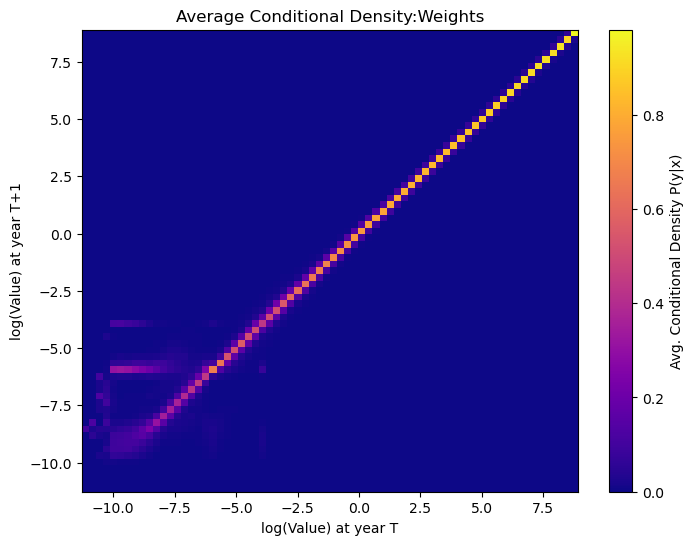

Saved PNG: avg_condit_weights.png
Saved Parquet: avg_condit_weights.parquet


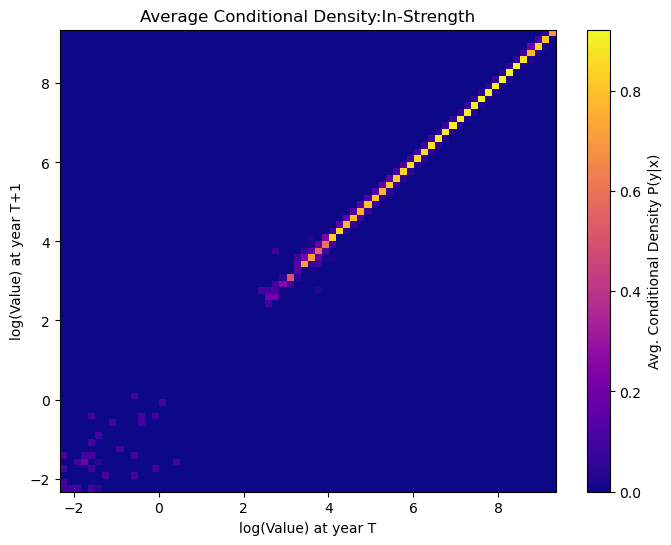

Saved PNG: avg_condit_in.png
Saved Parquet: avg_condit_in.parquet


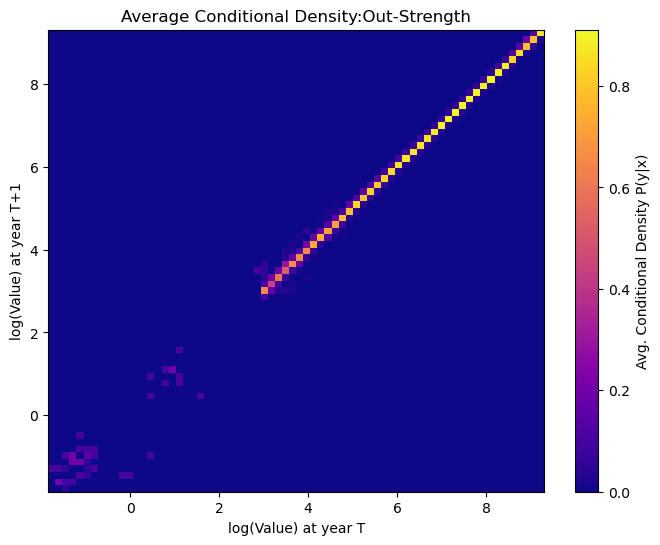

Saved PNG: avg_condit_out.png
Saved Parquet: avg_condit_out.parquet


In [104]:
log_average_conditional(weights, title='Weights', output_prefix='avg_condit_weights')
log_average_conditional(in_strength, title='In-Strength', output_prefix='avg_condit_in')
log_average_conditional(out_strength, title='Out-Strength', output_prefix='avg_condit_out')

In [82]:
log_average_conditional(clus_values, title='Clustering', output_prefix='avg_condit_clus')
average_conditional(hub_values, title='Hub', output_prefix='avg_condit_hub')
average_conditional(aut_values, title='Authorities', output_prefix='avg_condit_aut')

TypeError: 'numpy.ndarray' object is not callable

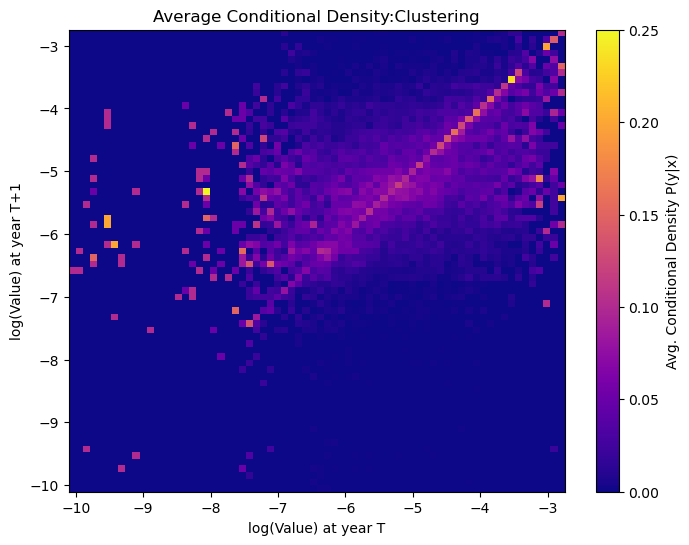

Saved PNG: avg_condit_clus.png
Saved Parquet: avg_condit_clus.parquet


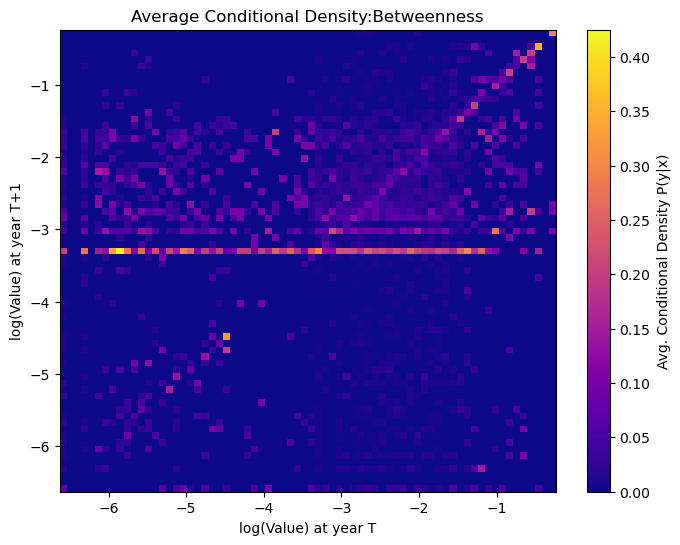

Saved PNG: avg_condit_bc.png
Saved Parquet: avg_condit_bc.parquet


In [116]:
log_average_conditional(clus_values, title='Clustering', output_prefix='avg_condit_clus')
log_average_conditional(bce_values, title='Betweenness', output_prefix='avg_condit_bc')

In [141]:
nonzero_data = [x for x in bce_values[2013] if x != 0]
print(statistics.median(nonzero_data))

0.0012412401389059486


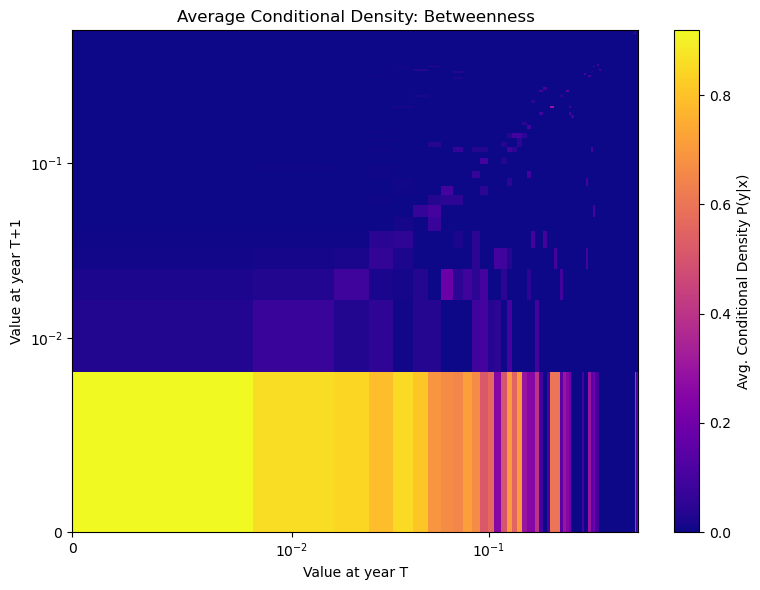

Saved PNG: symlog_avg_condit_bc.png
Saved Parquet: symlog_avg_condit_bc.parquet


In [156]:
symlog_average_conditional(bce_values, 70, title='Betweenness', output_prefix='symlog_avg_condit_bc')

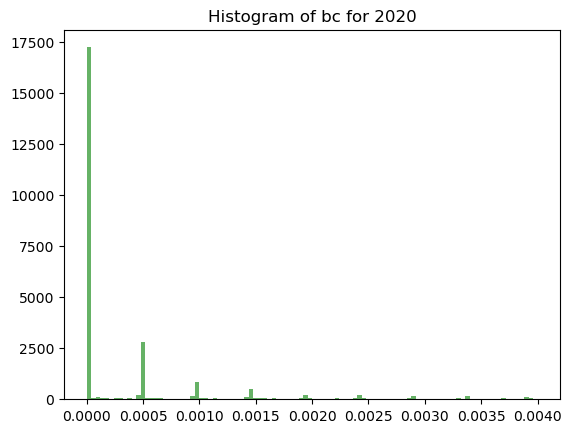

In [165]:
data = bce_values[2020]
#log_data = np.log10(data)

plt.hist(data, bins=100, range=(0, 0.004), density=True, alpha=0.6, color='g')
plt.title('Histogram of bc for 2020')
plt.show()

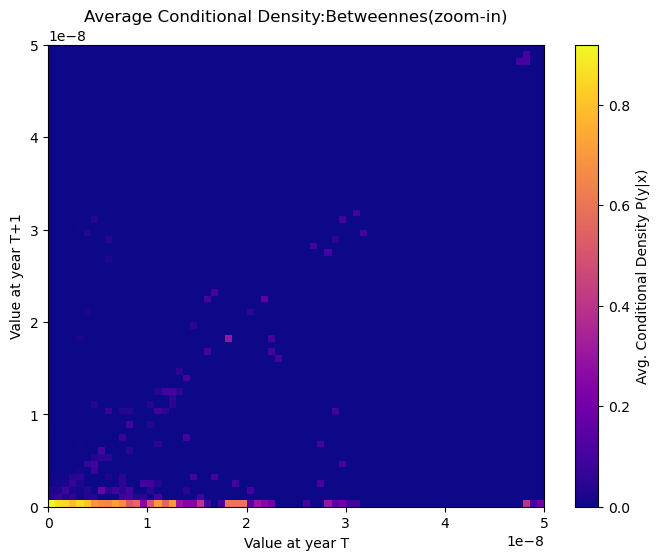

Saved PNG: avg_condit_limit_bc.png
Saved Parquet: avg_condit_limit_bc.parquet


In [174]:
average_conditional(bce_values, title='Betweennes(zoom-in)', output_prefix='avg_condit_limit_bc', plot_value_max=0.00000005)

In [186]:
#transition probability
years = list(range(2010, 2021))
#K = 10       # Number of quantile classes
#tau = 1      # Time lag
#omega = 1    # Window around diagonal

def quantile_class(series, K):
    return pd.qcut(series, q=K, labels=False, duplicates='drop')

def compute_transition_matrix(dict, name='', K=100, tau=1):
    counts = np.zeros((K, K))
    for t in range(tau, len(years)):
        year_t = years[t]
        year_t_tau = years[t - tau]

        x_t = dict[year_t][name]
        x_t_tau = dict[year_t_tau][name]

        qc_t = quantile_class(x_t, K)
        qc_t_tau = quantile_class(x_t_tau, K)

        for i, j in zip(qc_t_tau, qc_t):
            counts[int(i), int(j)] += 1

    # Normalize to get transition probabilities
    with np.errstate(divide='ignore', invalid='ignore'):
        P = counts / counts.sum(axis=1, keepdims=True)
        P[np.isnan(P)] = 0  # Replace NaNs from 0/0 with 0
    return P

def compute_M_tau_omega(P, K=100, omega=1):
    return (1 / K) * sum(
        P[h, l]
        for h, l in product(range(K), repeat=2)
        if abs(h - l) <= omega
    )
        

In [195]:
clus_trans_matrix = compute_transition_matrix(clus, name='Clustering_Coefficient', K=100, tau=1)
M_clus = compute_M_tau_omega(clus_trans_matrix, K=100, omega=1)
print(M_clus)

0.10846190476190457


In [199]:
clus_trans_matrix2 = compute_transition_matrix(clus, name='Clustering_Coefficient', K=5, tau=1)
M_clus2 = compute_M_tau_omega(clus_trans_matrix2, K=5, omega=1)
print(M_clus2)

0.6812756529302523


In [202]:
bce_trans_matrix = compute_transition_matrix(bce, name='betweenness', K=100, tau=1)
bce_M = compute_M_tau_omega(bce_trans_matrix, K=100, omega=1)
print(bce_M)

0.045420928084002846


In [205]:
hub_trans_matrix = compute_transition_matrix(hub_aut, name='hub_score', K=100, tau=1)
hub_M = compute_M_tau_omega(hub_trans_matrix, K=100, omega=1)
print(hub_M)

0.7207547619047614


In [206]:
aut_trans_matrix = compute_transition_matrix(hub_aut, name='authority_score', K=100, tau=1)
aut_M = compute_M_tau_omega(aut_trans_matrix, K=100, omega=1)
print(aut_M)

0.6876190476190478


In [221]:
nodes = clus[2020]['Node']
in_strength_with_node = {}
for year in years:
    in_strength_with_node[year] = pd.DataFrame({
    'Node': nodes,
    'in_strength': in_strength[year]
    })

out_strength_with_node = {}
for year in years:
    out_strength_with_node[year] = pd.DataFrame({
    'Node': nodes,
    'out_strength': out_strength[year]
    })
in_strength_with_node = {}
for year in years:
    in_strength_with_node[year] = pd.DataFrame({
    'Node': nodes,
    'in_strength': in_strength[year]
    })

out_strength_with_node = {}
for year in years:
    out_strength_with_node[year] = pd.DataFrame({
    'Node': nodes,
    'out_strength': out_strength[year]
    })



In [222]:
in_trans_matrix = compute_transition_matrix(in_strength_with_node, name='in_strength', K=100, tau=1)
in_M = compute_M_tau_omega(in_trans_matrix, K=100, omega=1)
print(in_M)

0.9359357142857154


In [223]:
out_trans_matrix = compute_transition_matrix(out_strength_with_node, name='out_strength', K=100, tau=1)
out_M = compute_M_tau_omega(out_trans_matrix, K=100, omega=1)
print(out_M)

0.9381071428571437


In [230]:

M = pd.DataFrame({
    'Statistics': ['clus', 'bce', 'hub', 'aut', 'in', 'out' ],
     'M(τ=1, ω=1, K=100)': [M_clus, bce_M, hub_M, aut_M, in_M, out_M]
    })
print(M)

M.to_parquet('M_values.parquet')

  Statistics  M(τ=1, ω=1, K=100)
0       clus            0.108462
1         bc            0.045421
2        hub            0.720755
3        aut            0.687619
4         in            0.935936
5        out            0.938107


In [10]:
for year in  range(2010, 2021):
    diff = in_strength[year] - out_strength[year]
    non_zero_diff = diff[diff != 0]
    print(f"non zero elements in {year}: {non_zero_diff}")


non zero elements in 2010: [-6.49632781e+06 -1.07580544e+06  1.91992327e+05 ... -2.58553629e+08
  2.50794042e+06 -5.83398785e+06]
non zero elements in 2011: [-7.64907509e+06 -1.17985599e+06  9.66238191e+04 ... -2.85712819e+08
  2.35485442e+06 -7.54928103e+06]
non zero elements in 2012: [-6.99226742e+06 -1.76298249e+06 -1.28360917e+05 ... -3.11110903e+08
  2.09934378e+06 -8.58232787e+06]
non zero elements in 2013: [-5.67207878e+06 -1.88585782e+06 -1.48592007e+05 ... -3.16505779e+08
  2.57967152e+06 -8.50788230e+06]
non zero elements in 2014: [-6.38446436e+06 -1.59812927e+06 -8.35950823e+04 ... -3.43881321e+08
  3.33018273e+06 -8.01532753e+06]
non zero elements in 2015: [-5.83763935e+06 -1.51703440e+06 -2.58085587e+03 ... -3.51016176e+08
  4.72302730e+06 -5.62932706e+06]
non zero elements in 2016: [-8.52807659e+06 -1.46171505e+06 -4.93384087e+05 ... -3.75149838e+08
  4.71747416e+06 -5.02700153e+06]
non zero elements in 2017: [-9.08522666e+06 -1.46734771e+06 -5.15594811e+05 ... -3.9020845

In [10]:
years = range(2010, 2021)
all_labels = list(years) + labels

def correl_coeff(array, my_dict, values='', title=''):
    results = {
        'year': [],
        title: []
    }

    for label in all_labels:
        dict_values = np.array(my_dict[label][values])
        correlation = np.corrcoef(dict_values, array[label])[0, 1]
        results['year'].append(label)
        results[title].append(correlation)

    return pd.DataFrame(results)
 

In [11]:
corr_in_clus = correl_coeff(in_strength, clus, values = 'Clustering_Coefficient', title= 'In vs Clus')
corr_out_clus = correl_coeff(out_strength, clus, values = 'Clustering_Coefficient', title= 'Out vs Clus')
corr_in_bce = correl_coeff(in_strength, bce, values = 'betweenness', title= 'In vs Bce')
corr_out_bce = correl_coeff(out_strength, bce, values = 'betweenness', title= 'Out vs Bce')

In [12]:
corr_in_clus.set_index('year', inplace=True)
corr_out_clus.set_index('year', inplace=True)
corr_in_bce.set_index('year', inplace=True)
corr_out_bce.set_index('year', inplace=True)

correlation = pd.concat([corr_in_clus, corr_out_clus, corr_in_bce, corr_out_bce], axis=1)
print(correlation)

      In vs Clus  Out vs Clus  In vs Bce  Out vs Bce
year                                                
2010    0.003114    -0.001925   0.003918    0.015822
2011   -0.037255    -0.030723   0.000974   -0.003404
2012   -0.013947     0.003790   0.001092   -0.001056
2013   -0.010542    -0.011619   0.005485   -0.005164
2014   -0.027272    -0.018547   0.005371   -0.002606
2015   -0.018356    -0.021496  -0.010851   -0.012036
2016   -0.001191     0.005755  -0.015026   -0.007103
2017   -0.023490    -0.019245  -0.011034   -0.006548
2018   -0.030459    -0.028982  -0.009409   -0.008051
2019   -0.011906    -0.021965  -0.012190   -0.009051
2020   -0.017449    -0.019117  -0.007311   -0.007832
eu     -0.027947    -0.031325   0.038003   -0.016582
gl     -0.022794    -0.022165  -0.011619   -0.012189
bc     -0.028221    -0.026574  -0.008723   -0.006464


In [56]:
correlation.index = correlation.index.astype(str)
correlation.to_parquet('Correlation.parquet')

In [48]:
corr_in_spar_clus = correl_coeff(in_strength_s, clus, values = 'Clustering_Coefficient', title= 'In(spar) vs Clus')
corr_out_spar_clus = correl_coeff(out_strength_s, clus, values = 'Clustering_Coefficient', title= 'Out(spar) vs Clus')
corr_in_spar_bce = correl_coeff(in_strength_s, bce, values = 'betweenness', title= 'In(spar) vs Bce')
corr_out_spar_bce = correl_coeff(out_strength_s, bce, values = 'betweenness', title= 'Out(spar) vs Bce')

In [49]:
corr_in_spar_clus.set_index('year', inplace=True)
corr_out_spar_clus.set_index('year', inplace=True)
corr_in_spar_bce.set_index('year', inplace=True)
corr_out_spar_bce.set_index('year', inplace=True)

correlation_spar_1 = pd.concat([corr_in_spar_clus, corr_out_spar_clus, corr_in_spar_bce, corr_out_spar_bce], axis=1)
print(correlation_spar_1)

      In(spar) vs Clus  Out(spar) vs Clus  In(spar) vs Bce  Out(spar) vs Bce
year                                                                        
2010          0.507077           0.419547         0.498098          0.567063
2011          0.514506           0.414325         0.498276          0.581345
2012          0.522357           0.404659         0.506637          0.588394
2013          0.526359           0.422113         0.504234          0.584768
2014          0.525021           0.422192         0.498626          0.582316
2015          0.531152           0.429762         0.494155          0.564738
2016          0.536893           0.439536         0.491288          0.561035
2017          0.536753           0.421506         0.488887          0.568397
2018          0.536783           0.413472         0.484983          0.570962
2019          0.531304           0.416568         0.485434          0.568598
2020          0.532718           0.416828         0.477691          0.526084

In [35]:
Aver_in_nn_in = {}
Aver_out_nn_out = {}
for label in all_labels:
    #average nearest in-neighbors (nodes pointing to that node) in-strength
    Aver_in_nn_in[label] = nx.average_neighbor_degree(G_s[label], weight='weight', source='in', target='in')
    # Convert dictionary to DataFrame
    Aver_in_nn_in[label] = pd.DataFrame.from_dict(Aver_in_nn_in[label], orient='index', columns=['Average_NN_In_Strength'])
    Aver_in_nn_in[label].reset_index(inplace=True)
    Aver_in_nn_in[label].columns = ['Node', 'Average_NN_In_Strength']
    
    #average nearest out-neighbors (nodes pointed by that node) out-strength
    Aver_out_nn_out[label] = nx.average_neighbor_degree(G_s[label], weight='weight', source='out', target='out')
    # Convert dictionary to DataFrame
    Aver_out_nn_out[label] = pd.DataFrame.from_dict(Aver_out_nn_out[label] , orient='index', columns=['Average_NN_Out_Strength'])
    Aver_out_nn_out[label] .reset_index(inplace=True)
    Aver_out_nn_out[label] .columns = ['Node', 'Average_NN_Out_Strength']

In [53]:
corr_in_spar_ann_in = correl_coeff(in_strength_s, Aver_in_nn_in, values = 'Average_NN_In_Strength', title= 'In(spar) vs ANN_In')
corr_out_spar_ann_out = correl_coeff(out_strength_s, Aver_out_nn_out, values = 'Average_NN_Out_Strength', title= 'Out(spar) vs ANN_Out')

corr_in_spar_ann_in.set_index('year', inplace=True)
corr_out_spar_ann_out.set_index('year', inplace=True)

correlation_spar = pd.concat([correlation_spar_1, corr_in_spar_ann_in, corr_out_spar_ann_out], axis=1)
print(correlation_spar)


      In(spar) vs Clus  Out(spar) vs Clus  In(spar) vs Bce  Out(spar) vs Bce  \
year                                                                           
2010          0.507077           0.419547         0.498098          0.567063   
2011          0.514506           0.414325         0.498276          0.581345   
2012          0.522357           0.404659         0.506637          0.588394   
2013          0.526359           0.422113         0.504234          0.584768   
2014          0.525021           0.422192         0.498626          0.582316   
2015          0.531152           0.429762         0.494155          0.564738   
2016          0.536893           0.439536         0.491288          0.561035   
2017          0.536753           0.421506         0.488887          0.568397   
2018          0.536783           0.413472         0.484983          0.570962   
2019          0.531304           0.416568         0.485434          0.568598   
2020          0.532718           0.41682

In [55]:
correlation_spar.index = correlation_spar.index.astype(str)
correlation_spar.to_parquet('Correlation_spar.parquet')

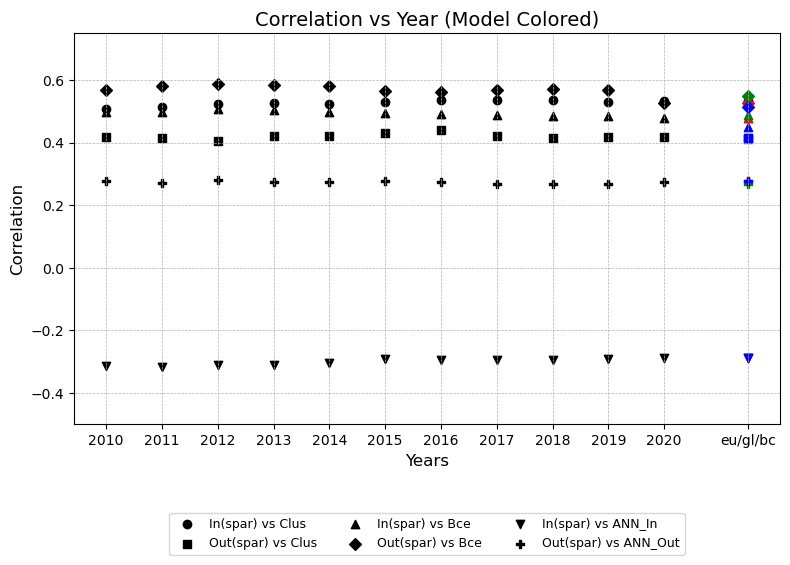

In [75]:


# Reset and prepare data
df = correlation_spar.reset_index()

# Convert 'year' to numeric where possible (non-numeric like 'eu' -> NaN)
df['year_num'] = pd.to_numeric(df['year'], errors='coerce')

# Separate numeric years and special cases
year_rows = df[df['year_num'].between(2010, 2020)].copy()
special_rows = df[df['year'].isin(['eu', 'gl', 'bc'])].copy()

# Plot settings
marker_styles = ['o', 's', '^', 'D', 'v', 'P', '*', 'X', '<', '>']
special_colors = {'eu': 'red', 'gl': 'green', 'bc': 'blue'}
special_x = 2021.5
xticks = list(range(2010, 2021)) + [special_x]
xtick_labels = list(range(2010, 2021)) + ['eu/gl/bc']

# Plot
plt.figure(figsize=(8, 6))

for i, col in enumerate(df.columns[1:-1]):  # skip 'year' and 'year_num'
    marker = marker_styles[i % len(marker_styles)]

    # Plot year points in black
    plt.scatter(year_rows['year_num'], year_rows[col], marker=marker, color='black', label=col)

    # Plot special values at same x (colored)
    for label in ['eu', 'gl', 'bc']:
        if label in special_rows['year'].values:
            y_val = special_rows.loc[special_rows['year'] == label, col].values[0]
            plt.scatter(special_x, y_val, marker=marker, color=special_colors[label])

# Final formatting
plt.xticks(xticks, xtick_labels)
plt.xlabel("Years", fontsize=12)
plt.ylabel("Correlation", fontsize=12)
plt.title("Correlation vs Year (Model Colored)", fontsize=14)
plt.ylim(-0.5, 0.75)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend(title="", loc='lower center', bbox_to_anchor=(0.5, -0.35), ncol=3, fontsize=9)
plt.tight_layout()
plt.show()


In [94]:
Stat_measures.to_parquet('Stat_measures.parquet', index = True)
print(Stat_measures)

                   Clus                                        Bc            \
                   Mean       STD  Skewness    Kurtosis      Mean       STD   
2010           0.000043  0.000115  6.451332   53.634791  0.004140  0.022331   
2011           0.000041  0.000110  6.888690   62.765315  0.004142  0.022532   
2012           0.000040  0.000112  7.478378   77.120743  0.004169  0.022957   
2013           0.000039  0.000109  7.451721   75.907610  0.004180  0.023000   
2014           0.000037  0.000106  7.577373   78.445852  0.004243  0.023078   
2015           0.000037  0.000107  7.856579   85.163195  0.004250  0.022931   
2016           0.000036  0.000107  7.969087   86.466395  0.004256  0.022804   
2017           0.000033  0.000099  8.324830   95.774828  0.004197  0.022661   
2018           0.000031  0.000094  8.457422   98.724045  0.004166  0.022400   
2019           0.000031  0.000092  8.327044   95.186402  0.004199  0.022594   
2020           0.000032  0.000095  8.581953  102.267

In [96]:
Stat_measures = pd.read_parquet('Stat_measures.parquet')
print(Stat_measures)

                   Clus                                        Bc            \
                   Mean       STD  Skewness    Kurtosis      Mean       STD   
2010           0.000043  0.000115  6.451332   53.634791  0.004140  0.022331   
2011           0.000041  0.000110  6.888690   62.765315  0.004142  0.022532   
2012           0.000040  0.000112  7.478378   77.120743  0.004169  0.022957   
2013           0.000039  0.000109  7.451721   75.907610  0.004180  0.023000   
2014           0.000037  0.000106  7.577373   78.445852  0.004243  0.023078   
2015           0.000037  0.000107  7.856579   85.163195  0.004250  0.022931   
2016           0.000036  0.000107  7.969087   86.466395  0.004256  0.022804   
2017           0.000033  0.000099  8.324830   95.774828  0.004197  0.022661   
2018           0.000031  0.000094  8.457422   98.724045  0.004166  0.022400   
2019           0.000031  0.000092  8.327044   95.186402  0.004199  0.022594   
2020           0.000032  0.000095  8.581953  102.267

In [97]:
print(Stat_measures.loc['avg_abs_incre'])

Clus          Mean        1.315693e-06
              STD         3.096023e-06
              Skewness    2.444691e-01
              Kurtosis    5.813388e+00
Bc            Mean        4.157993e-05
              STD         4.313518e-04
              Skewness    2.836359e-01
              Kurtosis    9.252682e+00
Hub           Mean        7.589415e-20
              STD         4.829954e-04
              Skewness    1.832742e+00
              Kurtosis    8.747949e+01
Aut           Mean        1.138412e-19
              STD         2.966416e-04
              Skewness    8.616345e-01
              Kurtosis    3.669359e+01
Weights       Mean        5.242201e+02
              STD         5.131037e+04
              Skewness    7.584612e+00
              Kurtosis    6.178877e+03
Out-Strength  Mean        1.081466e+06
              STD         5.044739e+06
              Skewness    6.281473e-02
              Kurtosis    1.941461e+00
In-Strength   Mean        1.081466e+06
              STD        

In [98]:
Stat_measures = Stat_measures.drop('avg_abs_incre')

In [99]:
# 1. Compute relative absolute difference: 
rel_abs_diff = (year_data.diff().abs()) / year_data.shift(1)

# 2. Drop the first row (NaN because no previous year)
rel_abs_diff = rel_abs_diff.drop(index=years[0])

# 3. Compute mean of relative differences for each column
avg_rel_abs_diff_row = rel_abs_diff.mean(axis=0)

# 4. Create DataFrame and insert after 'avg_abs_incre'
avg_rel_increm = pd.DataFrame([avg_rel_abs_diff_row], index=['avg_rel_increm'])

# 5. Insert into Stat_measures after 'avg_abs_incre'
before = Stat_measures.loc[:'avg_null']
after = Stat_measures.loc['eu':]
Stat_measures = pd.concat([before, avg_rel_increm, after])
print(Stat_measures)

                    Clus                                        Bc            \
                    Mean       STD  Skewness    Kurtosis      Mean       STD   
2010            0.000043  0.000115  6.451332   53.634791  0.004140  0.022331   
2011            0.000041  0.000110  6.888690   62.765315  0.004142  0.022532   
2012            0.000040  0.000112  7.478378   77.120743  0.004169  0.022957   
2013            0.000039  0.000109  7.451721   75.907610  0.004180  0.023000   
2014            0.000037  0.000106  7.577373   78.445852  0.004243  0.023078   
2015            0.000037  0.000107  7.856579   85.163195  0.004250  0.022931   
2016            0.000036  0.000107  7.969087   86.466395  0.004256  0.022804   
2017            0.000033  0.000099  8.324830   95.774828  0.004197  0.022661   
2018            0.000031  0.000094  8.457422   98.724045  0.004166  0.022400   
2019            0.000031  0.000092  8.327044   95.186402  0.004199  0.022594   
2020            0.000032  0.000095  8.58

In [101]:
Stat_measures.to_parquet('Stat_measures.parquet', index=True)

In [2]:
Stat_measures = pd.read_parquet('Stat_measures.parquet')
print(Stat_measures)

                    Clus                                        Bc            \
                    Mean       STD  Skewness    Kurtosis      Mean       STD   
2010            0.000043  0.000115  6.451332   53.634791  0.004140  0.022331   
2011            0.000041  0.000110  6.888690   62.765315  0.004142  0.022532   
2012            0.000040  0.000112  7.478378   77.120743  0.004169  0.022957   
2013            0.000039  0.000109  7.451721   75.907610  0.004180  0.023000   
2014            0.000037  0.000106  7.577373   78.445852  0.004243  0.023078   
2015            0.000037  0.000107  7.856579   85.163195  0.004250  0.022931   
2016            0.000036  0.000107  7.969087   86.466395  0.004256  0.022804   
2017            0.000033  0.000099  8.324830   95.774828  0.004197  0.022661   
2018            0.000031  0.000094  8.457422   98.724045  0.004166  0.022400   
2019            0.000031  0.000092  8.327044   95.186402  0.004199  0.022594   
2020            0.000032  0.000095  8.58

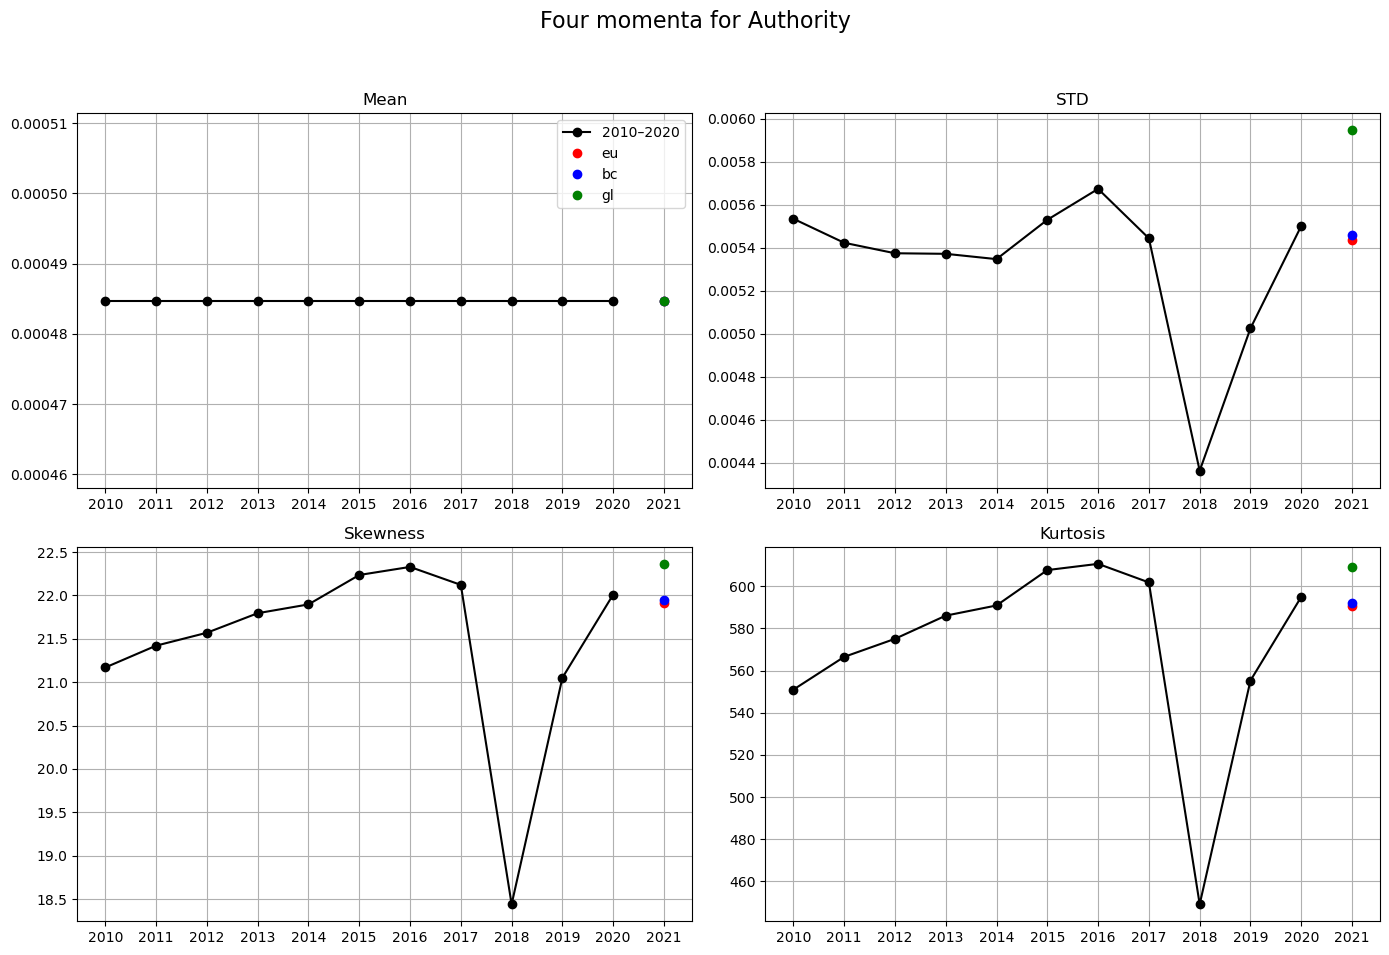

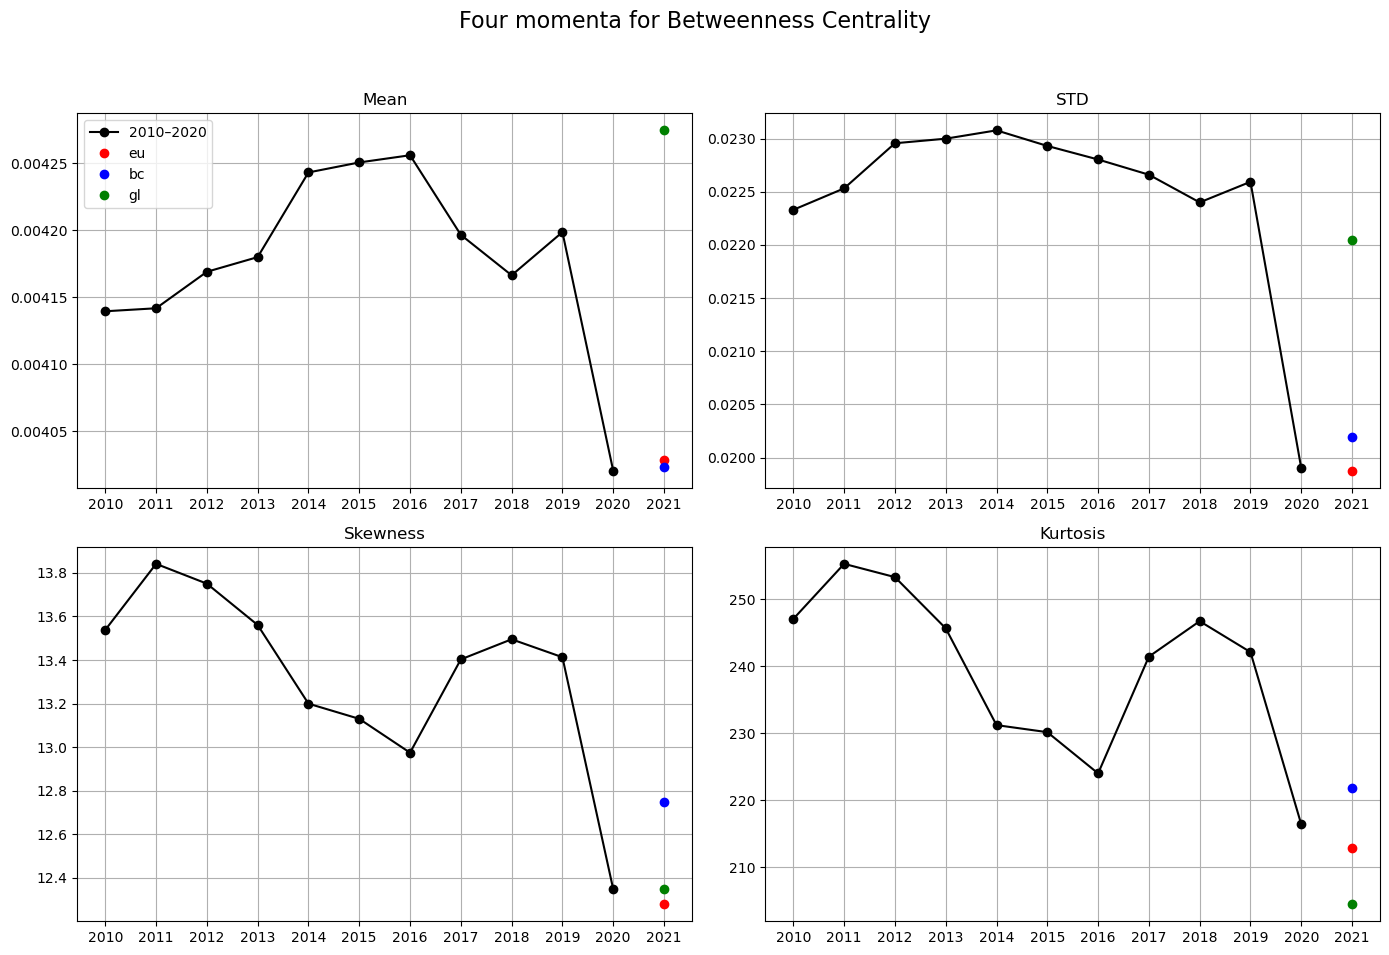

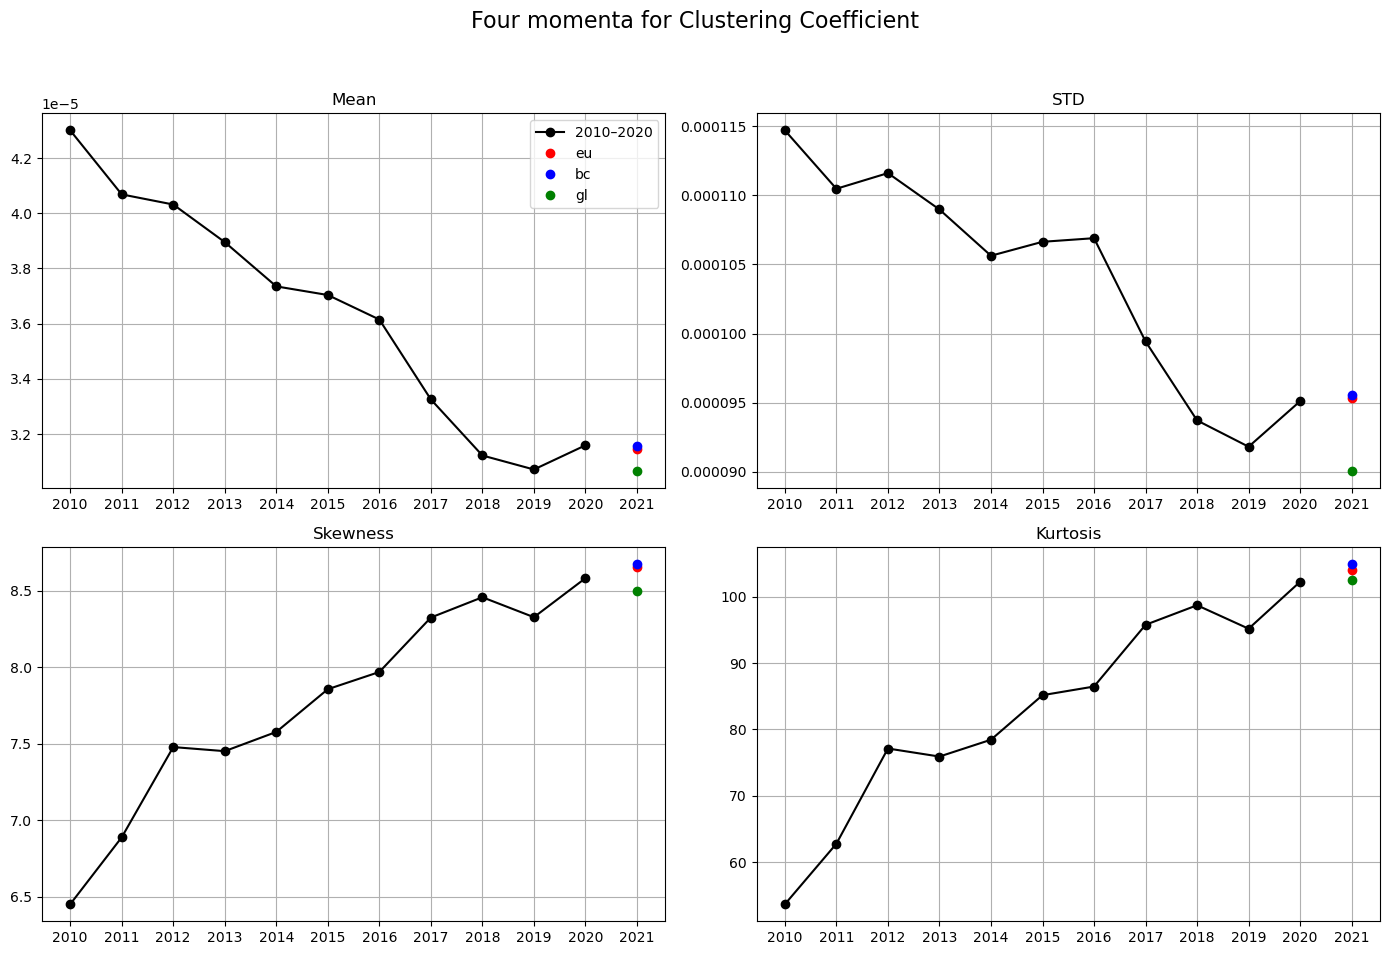

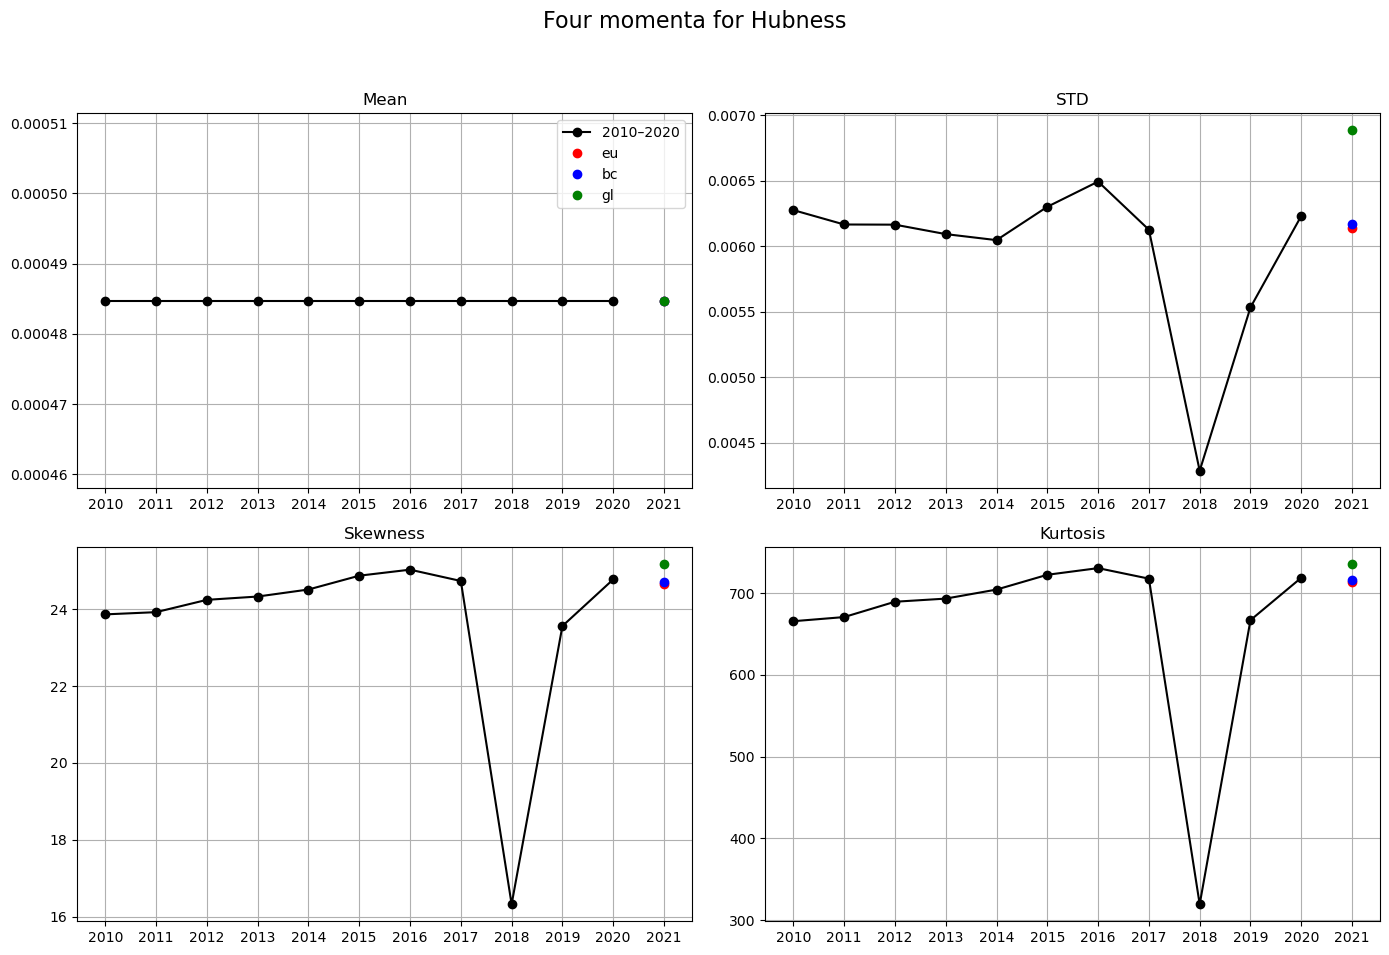

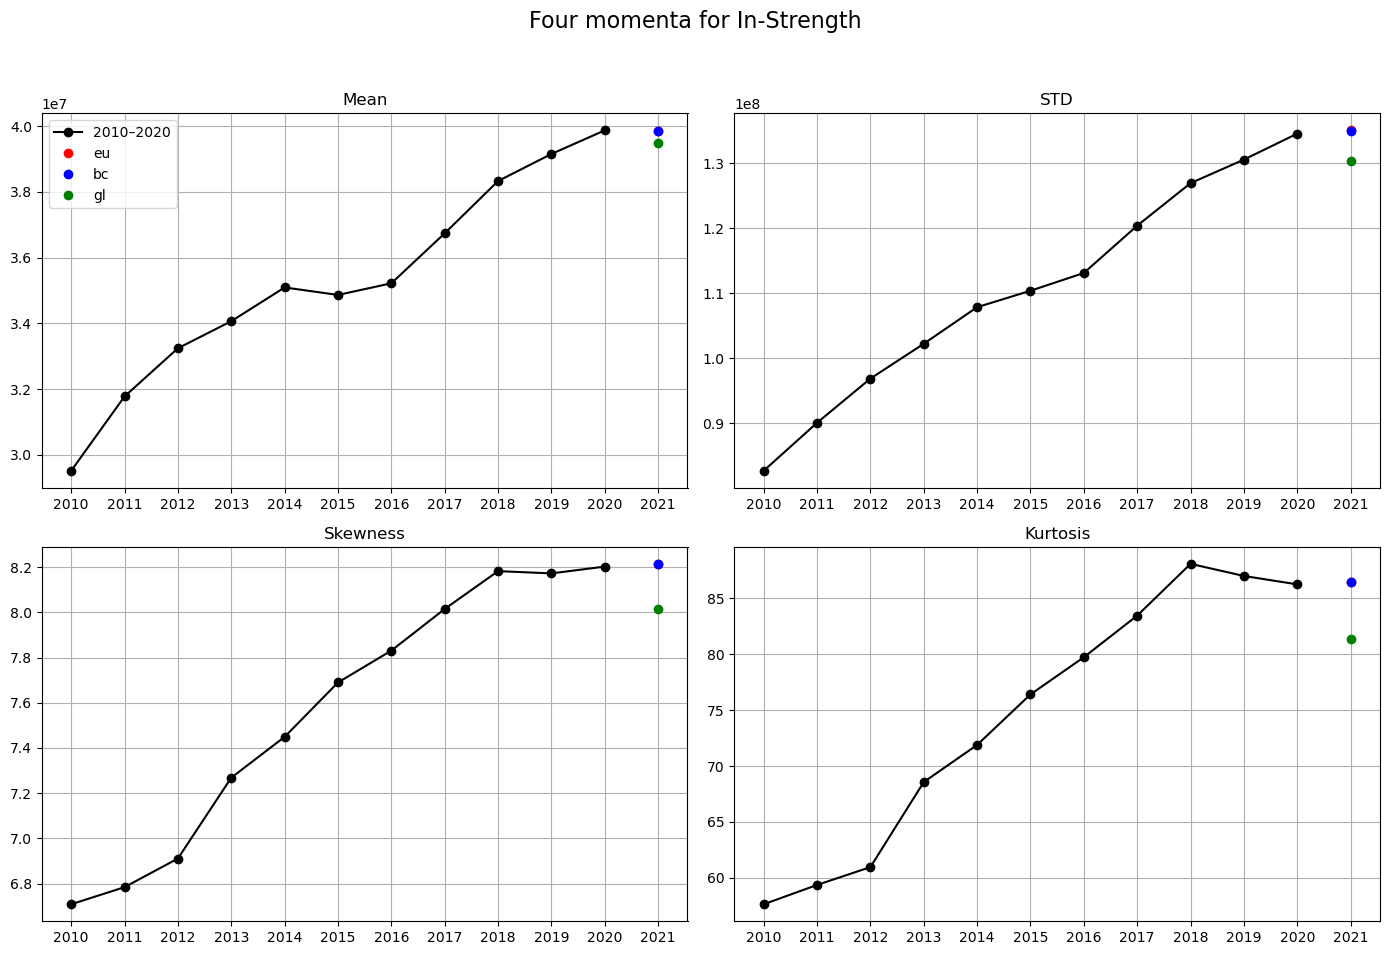

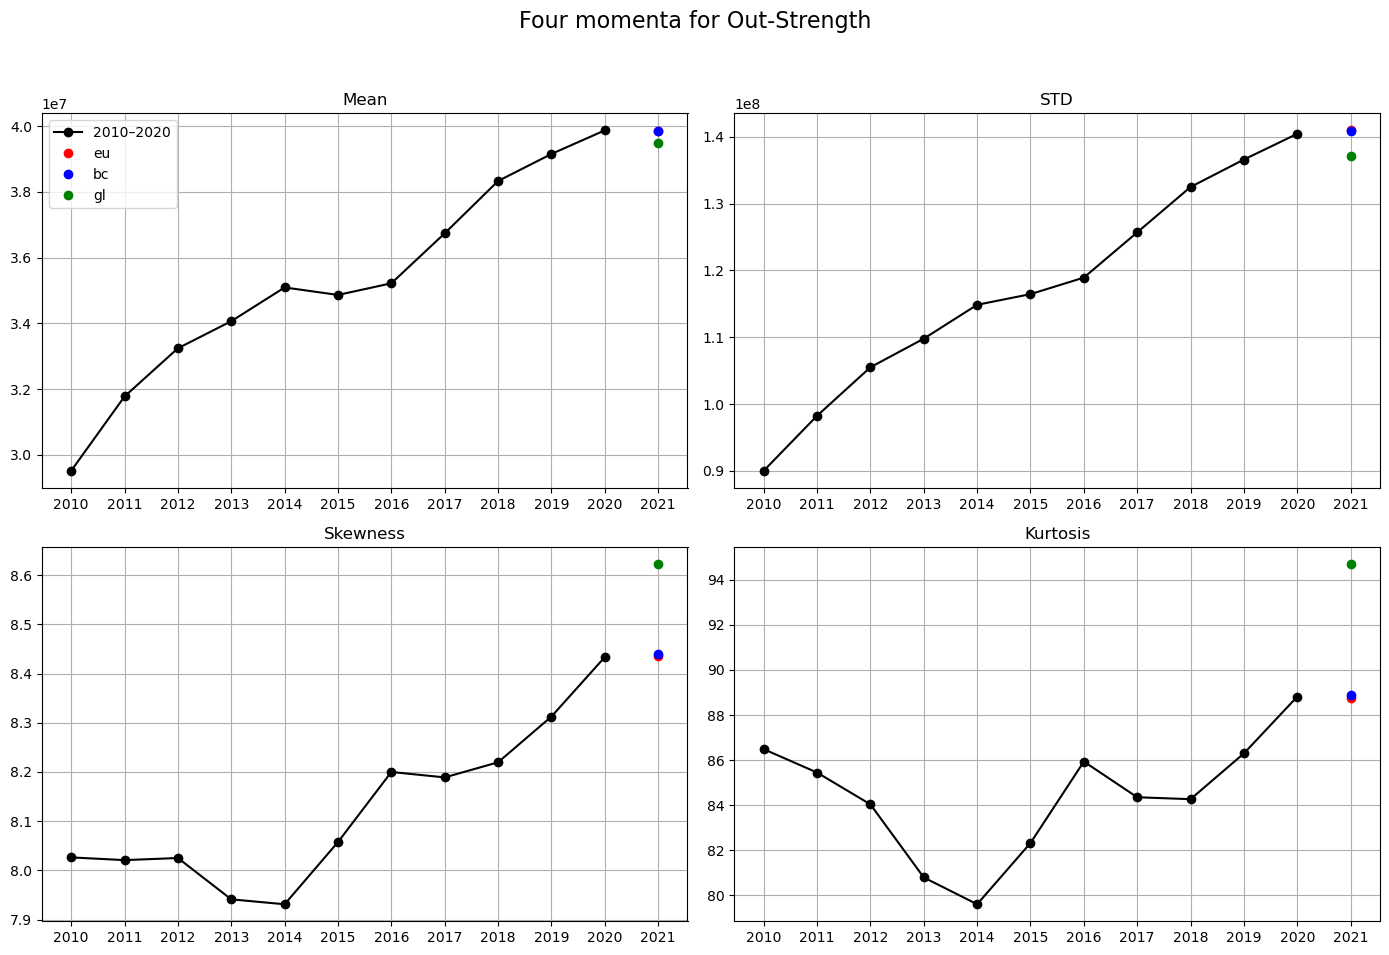

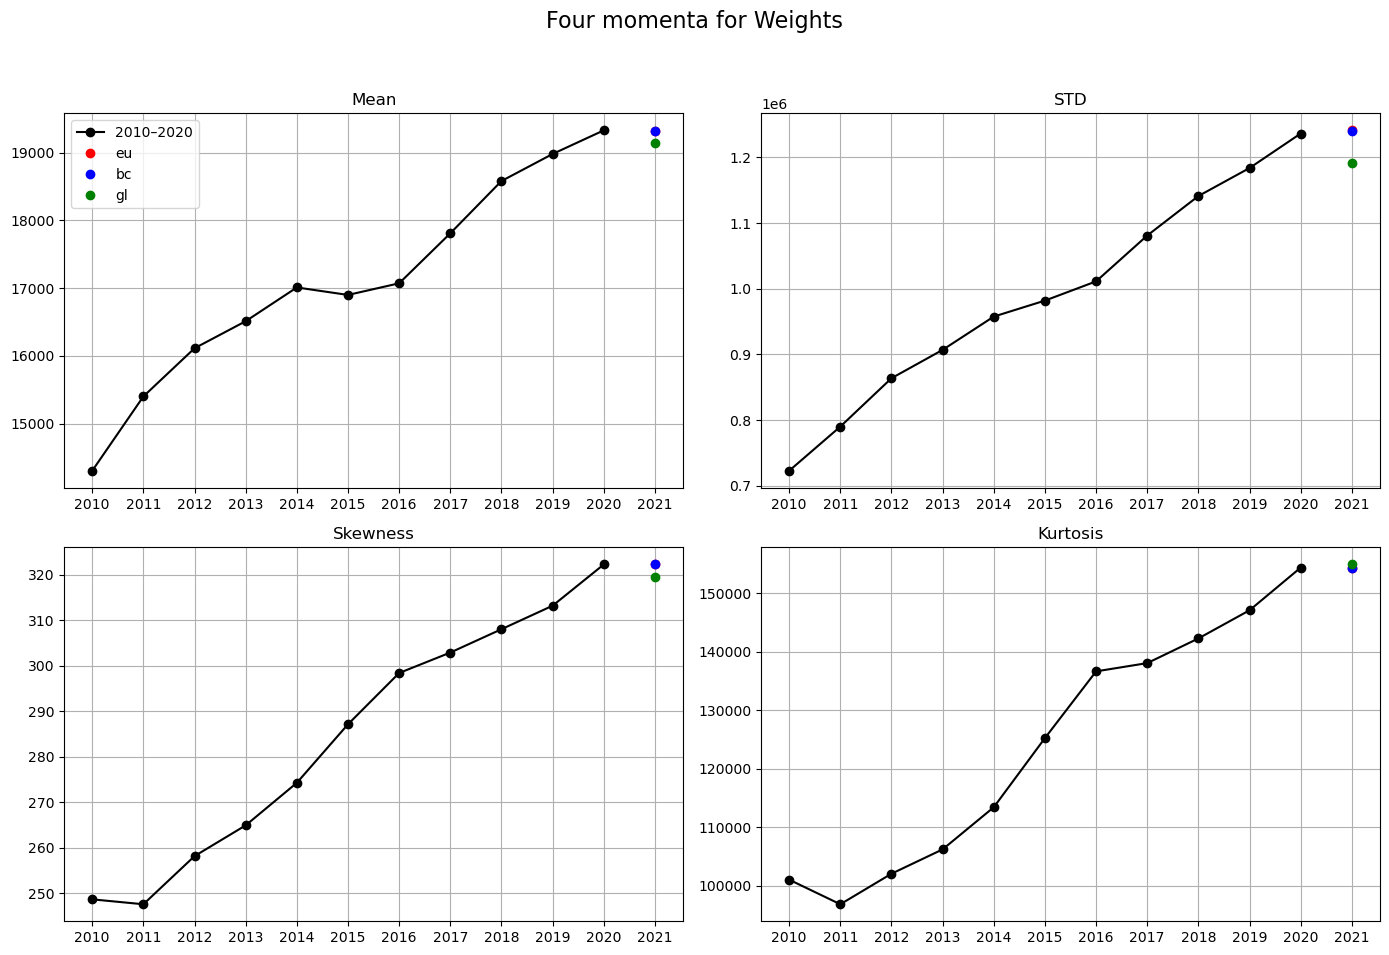

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your parquet file
df = pd.read_parquet('Stat_measures.parquet')

# Ensure index is of string type for consistency
df.index = df.index.astype(str)

# Define time range and special rows
years = [str(y) for y in range(2010, 2021)]
special_cases = ['eu', 'bc', 'gl']
x_special = 2021
colors = {'eu': 'red', 'bc': 'blue', 'gl': 'green'}
measures = ['Mean', 'STD', 'Skewness', 'Kurtosis']
name = {'Clus': 'Clustering Coefficient', 'Bc': 'Betweenness Centrality', 'Hub': 'Hubness', 'Aut': 'Authority',
        'In-Strength': 'In-Strength', 'Out-Strength': 'Out-Strength', 'Weights': 'Weights' }

# Extract top-level column categories
column_groups = df.columns.levels[0]

# Generate plots
for group in column_groups:
    fig, axs = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle(f"Four momenta for {name[group]}", fontsize=16)
    axs = axs.flatten()

    for i, measure in enumerate(measures):
        ax = axs[i]

        # Historical data (2010–2020)
        y_values = df.loc[years, (group, measure)].astype(float)
        ax.plot(range(2010, 2021), y_values, marker='o', color='black', label='2010–2020')

        # Special cases at 2021
        for case in special_cases:
            y = df.loc[case, (group, measure)]
            ax.plot(x_special, y, 'o', color=colors[case], label=case)

        ax.set_title(measure)
        ax.set_xticks(list(range(2010, 2022)))
        ax.grid(True)
        if i == 0:
            ax.legend()

    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    fig.savefig(f"{group}_stat_measures.png")
    plt.show()


In [12]:
# Reference year
base_year = '2020'

# Special rows for comparison
targets = ['eu', 'gl', 'bc']

# Calculate and append relative differences
for tag in targets:
    relative_diff = (Stat_measures.loc[tag] - Stat_measures.loc[base_year]) / Stat_measures.loc[base_year]
    Stat_measures.loc[f"{tag}_increm"] = relative_diff

print(Stat_measures)

                    Clus                                        Bc            \
                    Mean       STD  Skewness    Kurtosis      Mean       STD   
2010            0.000043  0.000115  6.451332   53.634791  0.004140  0.022331   
2011            0.000041  0.000110  6.888690   62.765315  0.004142  0.022532   
2012            0.000040  0.000112  7.478378   77.120743  0.004169  0.022957   
2013            0.000039  0.000109  7.451721   75.907610  0.004180  0.023000   
2014            0.000037  0.000106  7.577373   78.445852  0.004243  0.023078   
2015            0.000037  0.000107  7.856579   85.163195  0.004250  0.022931   
2016            0.000036  0.000107  7.969087   86.466395  0.004256  0.022804   
2017            0.000033  0.000099  8.324830   95.774828  0.004197  0.022661   
2018            0.000031  0.000094  8.457422   98.724045  0.004166  0.022400   
2019            0.000031  0.000092  8.327044   95.186402  0.004199  0.022594   
2020            0.000032  0.000095  8.58

In [16]:
correlation_spar = pd.read_parquet('Correlation_spar.parquet')
print(correlation_spar)

      In(spar) vs Clus  Out(spar) vs Clus  In(spar) vs Bce  Out(spar) vs Bce  \
year                                                                           
2010          0.507077           0.419547         0.498098          0.567063   
2011          0.514506           0.414325         0.498276          0.581345   
2012          0.522357           0.404659         0.506637          0.588394   
2013          0.526359           0.422113         0.504234          0.584768   
2014          0.525021           0.422192         0.498626          0.582316   
2015          0.531152           0.429762         0.494155          0.564738   
2016          0.536893           0.439536         0.491288          0.561035   
2017          0.536753           0.421506         0.488887          0.568397   
2018          0.536783           0.413472         0.484983          0.570962   
2019          0.531304           0.416568         0.485434          0.568598   
2020          0.532718           0.41682

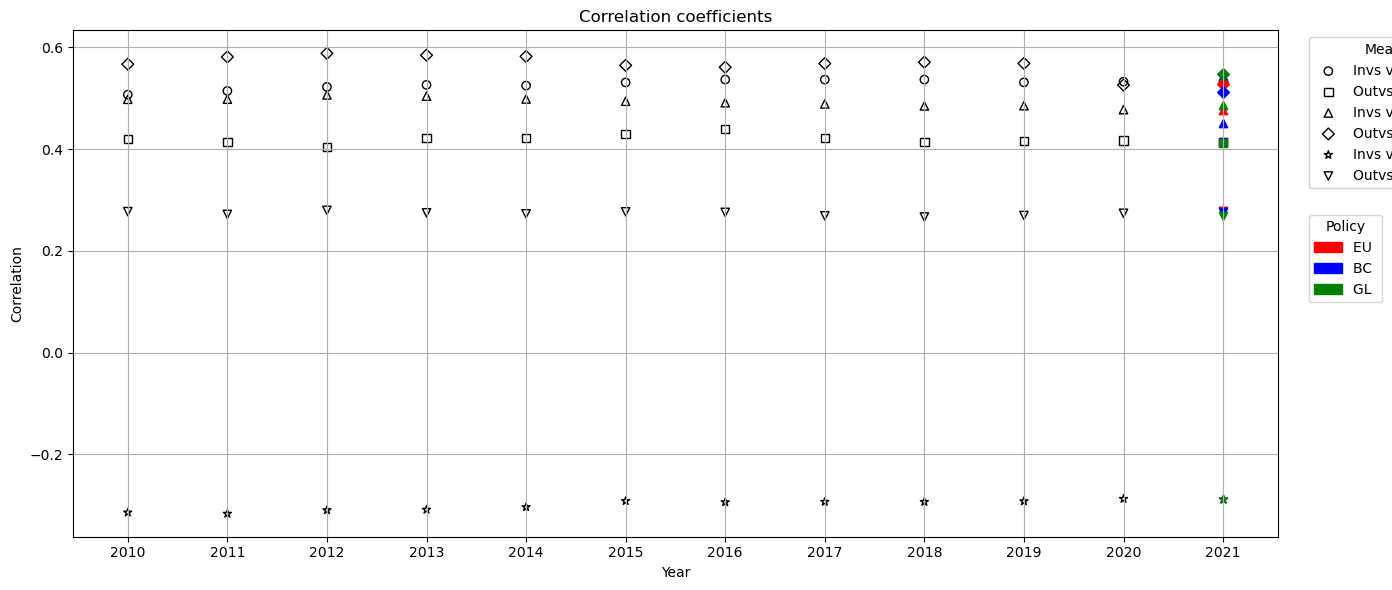

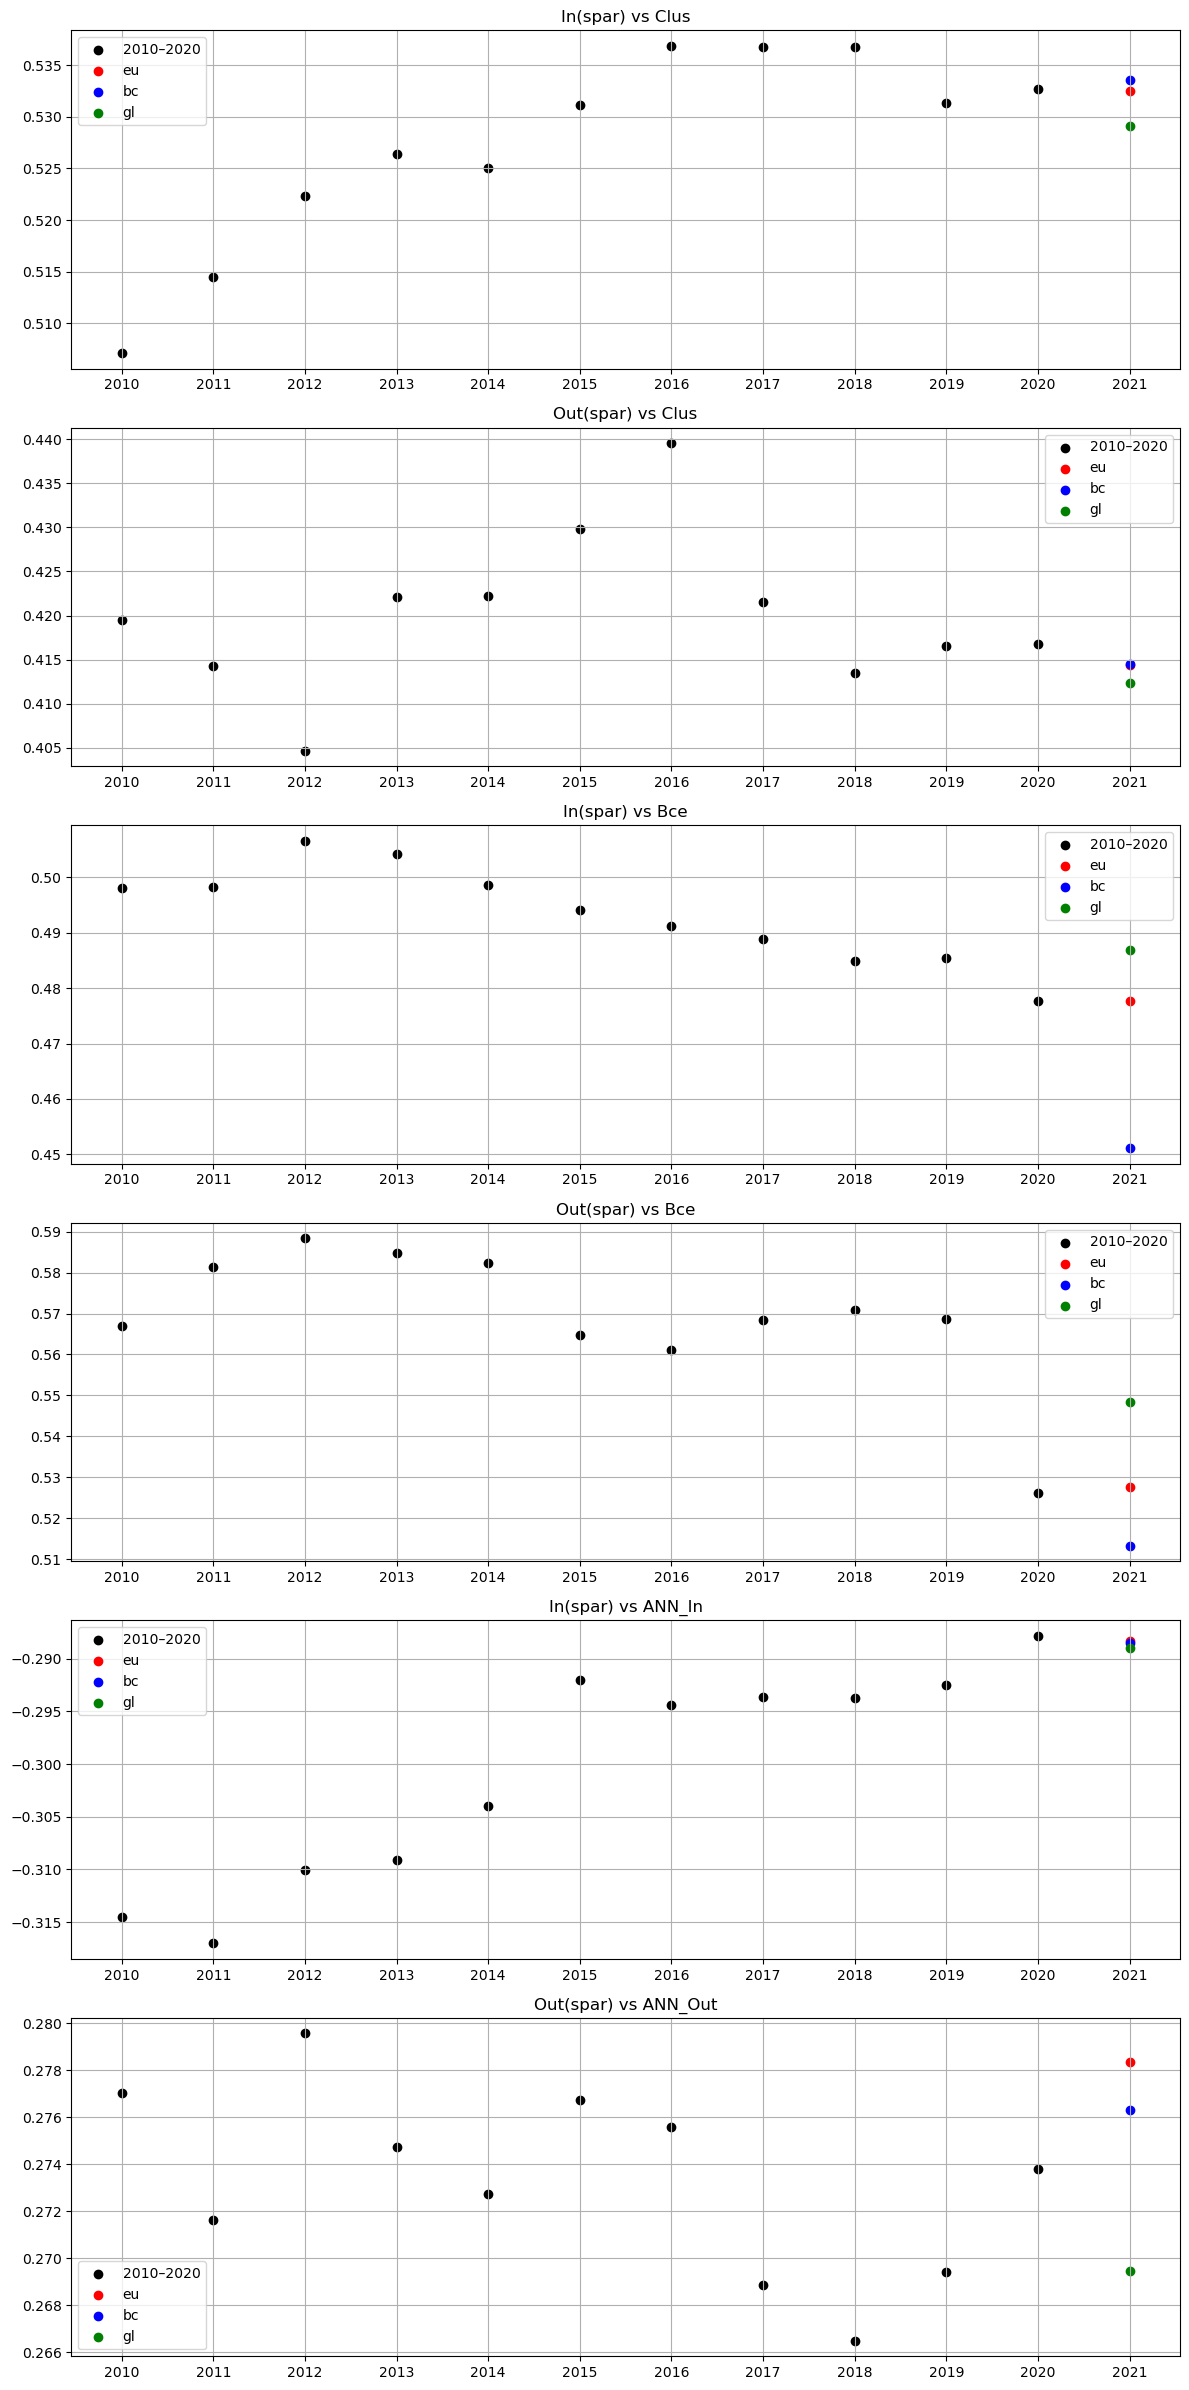

In [31]:
correlation_spar.index = correlation_spar.index.astype(str)
# Setup
years = [str(y) for y in range(2010, 2021)]
special_cases = ['eu', 'bc', 'gl']
colors = {'eu': 'red', 'bc': 'blue', 'gl': 'green'}
markers = ['o', 's', '^', 'D', '*', 'v', 'p', 'P']  # Avoid unfilled markers like 'x', '+'

# Function to clean column labels for legend
def clean_label(label):
    return label.replace('(spar) ', '').split(' vs ')[0].split()[0] + ' vs ' + label.split(' vs ')[1]

# === Plot 1 ===
plt.figure(figsize=(14, 6))
plotted_labels = set()

for i, column in enumerate(correlation_spar.columns):
    marker = markers[i % len(markers)]
    base_label = clean_label(column)

    # Plot main data (2010–2020)
    plt.scatter(
        [int(y) for y in years],
        correlation_spar.loc[years, column],
        marker=marker,
        edgecolors='black',
        facecolors='none'
    )

    # Add legend entry for measure
    if base_label not in plotted_labels:
        plt.scatter([], [], label=base_label, marker=marker, edgecolors='black', facecolors='none')
        plotted_labels.add(base_label)

    # Plot special cases (2021)
    for case in special_cases:
        plt.scatter(
            2021,
            correlation_spar.loc[case, column],
            color=colors[case],
            marker=marker
        )

# === Legends ===

# Legend for measures (marker styles)
handles1, labels1 = plt.gca().get_legend_handles_labels()
legend1 = plt.legend(handles=handles1, title="Measures", loc='upper left', bbox_to_anchor=(1.02, 1.0))

# Legend for special cases (color patches)
color_patches = [
    mpatches.Patch(color=color, label=f"{case.upper()} ")
    for case, color in colors.items()
]
legend2 = plt.legend(handles=color_patches, title="Policy", loc='upper left', bbox_to_anchor=(1.02, 0.65))

# Add both legends to the plot
plt.gca().add_artist(legend1)

# Final formatting
plt.title("Correlation coefficients")
plt.xlabel("Year")
plt.ylabel("Correlation")
plt.xticks(list(range(2010, 2022)))
plt.grid(True)
plt.tight_layout()
fig.savefig("correlations_all.png")
plt.show()





# === Plot 2: One subplot per measure ===
n_measures = len(correlation_spar.columns)
fig, axs = plt.subplots(n_measures, 1, figsize=(12, 4 * n_measures))

# Ensure axs is always iterable
if n_measures == 1:
    axs = [axs]

for i, (column, ax) in enumerate(zip(correlation_spar.columns, axs)):
    # Regular years
    ax.scatter(
        [int(y) for y in years],
        correlation_spar.loc[years, column],
        marker='o',
        color='black',
        label='2010–2020'
    )
    # Special cases
    for case in special_cases:
        ax.scatter(
            2021,
            correlation_spar.loc[case, column],
            color=colors[case],
            marker='o',
            label=case
        )

    ax.set_title(column)
    ax.set_xticks(list(range(2010, 2022)))
    ax.grid(True)
    ax.legend()

fig.tight_layout()
fig.savefig('correlations_single.png')
plt.show()